In [1]:
from tools import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
import random, math, copy

In [2]:
itemNum=40 #物品数目
Bin=[80,80] #箱子宽度与高度
ran=list(range(itemNum))

# N4

In [3]:

N4 = [
    [61, 38],
    [7, 4],
    [9, 5],
    [5, 4],
    [5, 7],
    [7, 7],
    [9, 15],
    [4, 4],
    [4, 4],
    [32, 31],
    [4, 4],
    [5, 4],
    [8, 10],
    [4, 4],
    [5, 5],
    [32, 4],
    [7, 7],
    [5, 4],
    [5, 8],
    [7, 24],
    [5, 4],
    [10, 7],
    [4, 7],
    [20, 7],
    [5, 7],
    [5, 12],
    [5, 4],
    [11, 7],
    [8, 21],
    [9, 4],
    [5, 72],
    [5, 52],
    [5, 4],
    [9, 7],
    [5, 12],
    [9, 33],
    [4, 8],
    [9, 34],
    [4, 4],
    [29, 4]
]

AllItem = np.array(N4)

print(AllItem)


[[61 38]
 [ 7  4]
 [ 9  5]
 [ 5  4]
 [ 5  7]
 [ 7  7]
 [ 9 15]
 [ 4  4]
 [ 4  4]
 [32 31]
 [ 4  4]
 [ 5  4]
 [ 8 10]
 [ 4  4]
 [ 5  5]
 [32  4]
 [ 7  7]
 [ 5  4]
 [ 5  8]
 [ 7 24]
 [ 5  4]
 [10  7]
 [ 4  7]
 [20  7]
 [ 5  7]
 [ 5 12]
 [ 5  4]
 [11  7]
 [ 8 21]
 [ 9  4]
 [ 5 72]
 [ 5 52]
 [ 5  4]
 [ 9  7]
 [ 5 12]
 [ 9 33]
 [ 4  8]
 [ 9 34]
 [ 4  4]
 [29  4]]


# Bottom-Left

utilisation: 0.78265625


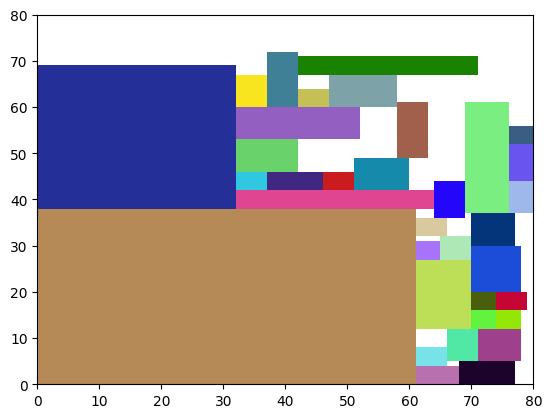

utilisation: 0.21734375


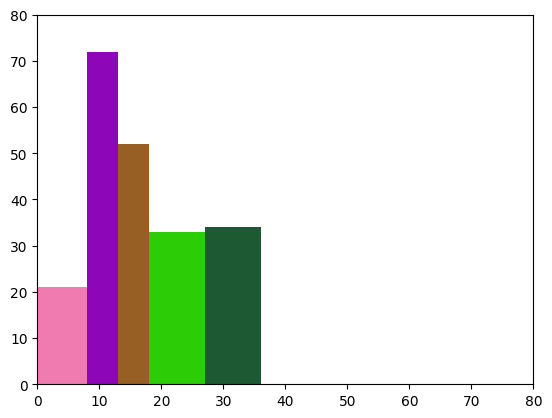

Average utilisation: 0.5
Running time: 0.32403016090393066 seconds


In [6]:
def bottom_left(itemNum, AllItem, Bin):
    ran = list(range(itemNum))

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # start packing
    #print(list(flagItem).count(0))
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  #The starting points are all at the top right corner of the bin.
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) #If overlap flagOL=1; vice versa flagOL=0
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) #Update the coordinates of the top-right corner vertex of the item after moving it down and left from its current position to its final position.
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) # Record the rectangle that fits into the box [ID,width,height].
                        flagItem[ran[j]]=1

            #utilisation
            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            #visualisation
            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))

# BL(bottom-left) Sorted by area (width * height)

utilisation: 0.80265625


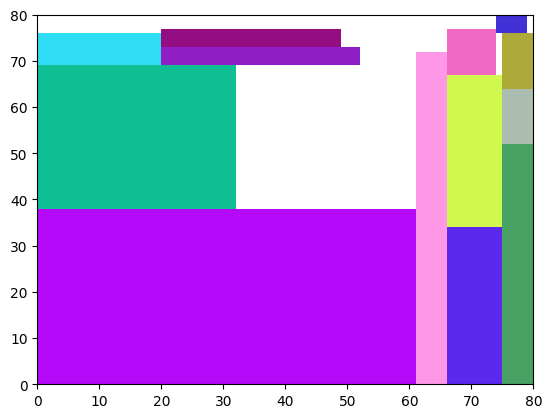

utilisation: 0.19734375


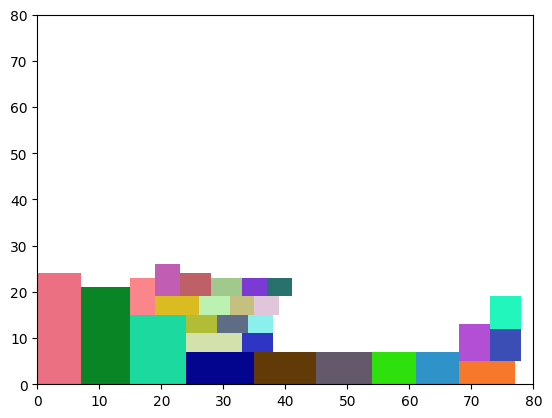

Average utilisation: 0.5
Running time: 0.2830014228820801 seconds


In [12]:
def bottom_left_sorted(itemNum, AllItem, Bin):
    ran = list(range(itemNum))
    ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
#     ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # Start packing.
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) 
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) 
                        flagItem[ran[j]]=1

            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_sorted(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))
        

# Bottom-left-fill (BLF) algorithm

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]]
utilisation: 0.88609375


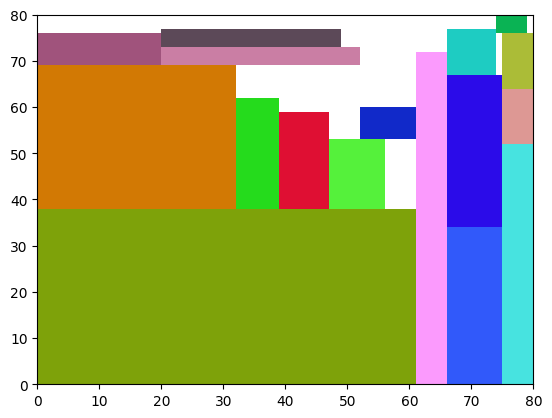

[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
utilisation: 0.11390625


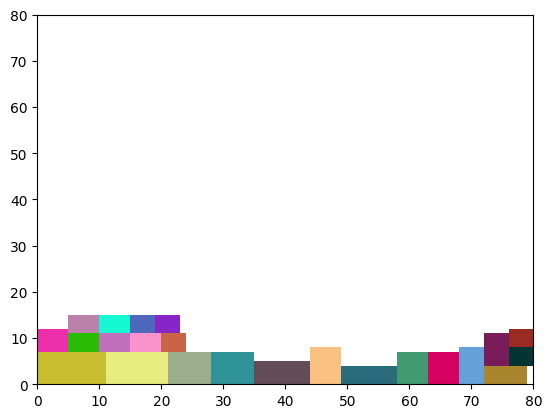

Average utilisation: 0.5
Running time: 0.45403337478637695 seconds


In [19]:
bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)  # Initially a 0 matrix, representing an empty bin
def find_largest_blank_region(bin_matrix):
    rows, cols = bin_matrix.shape
    max_width, max_height, max_area = 0, 0, 0
    start_row, start_col = 0, 0

    for r in range(rows):
        for c in range(cols):
            if bin_matrix[r, c] == 0:
                width, height = 0, 0
                while c + width < cols and bin_matrix[r, c + width] == 0:
                    width += 1
                while r + height < rows and bin_matrix[r + height, c] == 0:
                    height += 1
                area = width * height

                if area > max_area:
                    max_width, max_height, max_area = width, height, area
                    start_row, start_col = r, c

    return start_row, start_col, max_width, max_height

def bottom_left_fill(itemNum, AllItem, Bin, bin_matrix):
    ran = list(range(itemNum))
    ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
#     ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing

    for i in range(itemNum):
        if list(flagItem).count(0) > 0:
            BinNum = BinNum + 1
            RPNXY = []
            bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)
            for j in range(itemNum):
                if flagItem[ran[j]] == 0:
                    item = AllItem[ran[j], :]
                    itemRP = Bin  
                    flagOL = overlap(item, AllItem, itemRP, RPNXY)  
                    if flagOL == 0:
                        itemRP = finalPos(item, AllItem, itemRP, RPNXY)  
                        RPNXY.append([ran[j], itemRP[0], itemRP[1]])  
                        flagItem[ran[j]] = 1

                        # Update bin matrix with occupied areas of the item
                        width, height = item
                        lx, ly = itemRP[0] - width, itemRP[1] - height
                        bin_matrix[ly:itemRP[1], lx:itemRP[0]] += 1
            print(bin_matrix)

            # Find and try to place remaining items in the blank regions
            while True:
                start_row, start_col, max_width, max_height = find_largest_blank_region(bin_matrix)
                if max_width < 1 or max_height < 1:
                    break

                # Check if any remaining item can fit in the largest blank region
                remaining_items = [ran[j] for j in range(itemNum) if flagItem[ran[j]] == 0]
                item_placed = False
                for j in remaining_items:
                    width, height = AllItem[j, :]
                    if width <= max_width and height <= max_height:
                        # Temporarily place the item in the largest blank region
                        bin_matrix[start_row:start_row + height, start_col:start_col + width] += 1
                        RPNXY.append([j, start_col + width, start_row + height])  # 记录装进箱子的矩形【ID,width,height】
                        flagItem[j] = 1
                        item_placed = True
                        break

                # Check if the bin matrix is still valid (all values <= 1)
                if np.max(bin_matrix) <= 1:
                    if not item_placed:
                        break
                else:
                    # Roll back to the previous state and remove the last item placement
                    bin_matrix[start_row:start_row + max_height, start_col:start_col + max_width] = 0
                    RPNXY.pop()

            rect_area = np.sum(bin_matrix)  # Count the number of occupied cells (ones) in the bin_matrix
            bin_area = np.prod(Bin)  # Total number of cells in the bin_matrix
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width, height = AllItem[i[0]]
                rx, ry = i[1], i[2]
                lx, ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width, height, linewidth=1, facecolor=color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            # plt.savefig('result.png')

    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_fill(itemNum, AllItem, Bin, bin_matrix)
end_time = time.time()

print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))


# LLABF

# ABC with BL

utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.79828125
utilisation:0.719375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.67546875
utilisation:0.56046875
utilisation:0.68390625
utilisation:0.26625
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.4065625
utilisation:0.79515625
utilisation:0.4828125
utilisation:0.8553125

utilisation:0.2525
utilisation:0.46828125
utilisation:0.6740625
utilisation:0.4775
utilisation:0.52953125
utilisation:0.37453125
utilisation:0.72390625
utilisation:0.4265625
utilisation:0.68875
utilisation:0.42890625
utilisation:0.49453125
utilisation:0.46671875
utilisation:0.30609375
utilisation:0.75921875
utilisation:0.5409375
utilisation:0.2909375
utilisation:0.493125
utilisation:0.5971875
utilisation:0.4828125
utilisation:0.79859375
utilisation:0.2878125
utilisation:0.28
utilisation:0.66609375
utilisation:0.42875
utilisation:0.57953125
utilisation:0.80890625
utilisation:0.72421875
utilisation:0.63890625
utilisation:0.493125
utilisation:0.63
utilisation:0.41015625
utilisation:0.466875
utilisation:0.525
utilisation:0.32234375
utilisation:0.70484375
utilisation:0.5409375
utilisation:0.7996875
utilisation:0.50890625
utilisation:0.36984375
utilisation:0.5553125
utilisation:0.394375
utilisation:0.2434375
utilisation:0.216875
utilisation:0.338125
utilisation:0.49484375
utilisation:0.70031

utilisation:0.67546875
utilisation:0.47890625
utilisation:0.68703125
utilisation:0.4265625
utilisation:0.50296875
utilisation:0.61625
utilisation:0.67546875
utilisation:0.424375
utilisation:0.49453125
utilisation:0.755625
utilisation:0.68484375
utilisation:0.62015625
utilisation:0.5409375
utilisation:0.5971875
utilisation:0.53328125
utilisation:0.716875
utilisation:0.7946875
utilisation:0.38015625
utilisation:0.4421875
utilisation:0.51734375
utilisation:0.5146875
utilisation:0.6740625
utilisation:0.6328125
utilisation:0.345625
utilisation:0.5409375
utilisation:0.53
utilisation:0.515625
utilisation:0.661875
utilisation:0.62265625
utilisation:0.7925
utilisation:0.31171875
utilisation:0.31
utilisation:0.44671875
utilisation:0.8109375
utilisation:0.34828125
utilisation:0.5971875
utilisation:0.8275
utilisation:0.5075
utilisation:0.5409375
utilisation:0.37875
utilisation:0.5409375
utilisation:0.48765625
utilisation:0.53375
utilisation:0.493125
utilisation:0.27984375
utilisation:0.721875
util

utilisation:0.32984375
utilisation:0.49453125
utilisation:0.466875
utilisation:0.73171875
utilisation:0.5409375
utilisation:0.8165625
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.4828125
utilisation:0.6790625
utilisation:0.7003125
utilisation:0.691875
utilisation:0.5409375
utilisation:0.4003125
utilisation:0.48421875
utilisation:0.70703125
utilisation:0.73546875
utilisation:0.6646875
utilisation:0.5853125
utilisation:0.64203125
utilisation:0.62328125
utilisation:0.5815625
utilisation:0.43875
utilisation:0.5753125
utilisation:0.4003125
utilisation:0.47671875
utilisation:0.53375
utilisation:0.34796875
utilisation:0.40578125
utilisation:0.26421875
utilisation:0.64203125
utilisation:0.493125
utilisation:0.4265625
utilisation:0.7803125
utilisation:0.69453125
utilisation:0.53515625
utilisation:0.4490625
utilisation:0.53375
utilisation:0.4459375
utilisation:0.53671875
utilisation:0.71203125
utilisation:0.394375
utilisation:0.5709375
utilisation:0.19140625


utilisation:0.5209375
utilisation:0.4265625
utilisation:0.25203125
utilisation:0.53375
utilisation:0.62796875
utilisation:0.49359375
utilisation:0.38875
utilisation:0.58421875
utilisation:0.51953125
utilisation:0.5409375
utilisation:0.64203125
utilisation:0.65484375
utilisation:0.6725
utilisation:0.4265625
utilisation:0.32296875
utilisation:0.6221875
utilisation:0.6203125
utilisation:0.4828125
utilisation:0.64921875
utilisation:0.67546875
utilisation:0.4296875
utilisation:0.51359375
utilisation:0.51453125
utilisation:0.62734375
utilisation:0.703125
utilisation:0.37140625
utilisation:0.440625
utilisation:0.5815625
utilisation:0.65390625
utilisation:0.704375
utilisation:0.33203125
utilisation:0.5146875
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.7828125
utilisation:0.5284375
utilisation:0.5596875
utilisation:0.32625
utilisation:0.5553125
utilisation:0.46109375
utilisation:0.435
utilisation:0.24484375
utilisation:0.4265625
utilisation:0.58296875
utilisation:0.34796875
utilis

utilisation:0.549375
utilisation:0.659375
utilisation:0.57609375
utilisation:0.5315625
utilisation:0.3015625
utilisation:0.513125
utilisation:0.3234375
utilisation:0.5409375
utilisation:0.59171875
utilisation:0.4875
utilisation:0.81953125
utilisation:0.424375
utilisation:0.40875
utilisation:0.5553125
utilisation:0.33234375
utilisation:0.39984375
utilisation:0.19859375
utilisation:0.51734375
utilisation:0.5815625
utilisation:0.45359375
utilisation:0.78265625
utilisation:0.46171875
utilisation:0.5971875
utilisation:0.37875
utilisation:0.67125
utilisation:0.3859375
utilisation:0.40984375
utilisation:0.493125
utilisation:0.53515625
utilisation:0.7003125
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.4265625
utilisation:0.681875
utilisation:0.3859375
utilisation:0.5409375
utilisation:0.54359375
utilisation:0.3009375
utilisation:0.47953125
utilisation:0.38015625
utilisation:0.58875
utilisation:0.27
utilisation:0.748125
utilisation:0.37875
utilisation:0.493

utilisation:0.4778125
utilisation:0.5815625
utilisation:0.69578125
utilisation:0.3575
utilisation:0.649375
utilisation:0.78265625
utilisation:0.4703125
utilisation:0.5221875
utilisation:0.60359375
utilisation:0.58453125
utilisation:0.5540625
utilisation:0.49953125
utilisation:0.539375
utilisation:0.44
utilisation:0.4265625
utilisation:0.668125
utilisation:0.70171875
utilisation:0.81265625
utilisation:0.4421875
utilisation:0.7490625
utilisation:0.33234375
utilisation:0.541875
utilisation:0.33234375
utilisation:0.6140625
utilisation:0.35390625
utilisation:0.50703125
utilisation:0.6696875
utilisation:0.49046875
utilisation:0.5721875
utilisation:0.43546875
utilisation:0.7778125
utilisation:0.75140625
utilisation:0.62765625
utilisation:0.5146875
utilisation:0.73375
utilisation:0.53375
utilisation:0.53515625
utilisation:0.33234375
utilisation:0.6325
utilisation:0.493125
utilisation:0.5409375
utilisation:0.30609375
utilisation:0.43640625
utilisation:0.38859375
utilisation:0.53421875
utilisati

utilisation:0.6146875
utilisation:0.4090625
utilisation:0.37875
utilisation:0.48640625
utilisation:0.5815625
utilisation:0.41015625
utilisation:0.69453125
utilisation:0.58359375
utilisation:0.5146875
utilisation:0.53515625
utilisation:0.72625
utilisation:0.65390625
utilisation:0.73515625
utilisation:0.5815625
utilisation:0.34640625
utilisation:0.64921875
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.549375
utilisation:0.5815625
utilisation:0.500625
utilisation:0.243125
utilisation:0.70828125
utilisation:0.38859375
utilisation:0.52015625
utilisation:0.40546875
utilisation:0.5409375
utilisation:0.38859375
utilisation:0.6178125
utilisation:0.66828125
utilisation:0.41265625
utilisation:0.71
utilisation:0.67890625
utilisation:0.5409375
utilisation:0.243125
utilisation:0.62765625
utilisation:0.48703125
utilisation:0.23625
utilisation:0.38015625
utilisation:0.7175
utilisation:0.5971875
utilisation:0.306875
utilisation:0.78046875
utilisation:0.4496875
utilisation:0.43
utilisation:0

utilisation:0.36984375
utilisation:0.65390625
utilisation:0.69359375
utilisation:0.70171875
utilisation:0.5334375
utilisation:0.23984375
utilisation:0.68921875
utilisation:0.33234375
utilisation:0.67546875
utilisation:0.5409375
utilisation:0.475625
utilisation:0.3525
utilisation:0.65296875
utilisation:0.70828125
utilisation:0.493125
utilisation:0.64546875
utilisation:0.4003125
utilisation:0.5815625
utilisation:0.64
utilisation:0.27984375
utilisation:0.73
utilisation:0.424375
utilisation:0.49453125
utilisation:0.493125
utilisation:0.4265625
utilisation:0.4928125
utilisation:0.33234375
utilisation:0.7053125
utilisation:0.800625
utilisation:0.33234375
utilisation:0.5409375
utilisation:0.43640625
utilisation:0.5553125
utilisation:0.5815625
utilisation:0.74078125
utilisation:0.53515625
utilisation:0.44671875
utilisation:0.77328125
utilisation:0.6509375
utilisation:0.36203125
utilisation:0.6209375
utilisation:0.2725
utilisation:0.823125
utilisation:0.28875
utilisation:0.394375
utilisation:0.

utilisation:0.32625
utilisation:0.4265625
utilisation:0.5971875
utilisation:0.3440625
utilisation:0.49140625
utilisation:0.7984375
utilisation:0.52578125
utilisation:0.4428125
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.293125
utilisation:0.65578125
utilisation:0.72703125
utilisation:0.3275
utilisation:0.6740625
utilisation:0.53078125
utilisation:0.6759375
utilisation:0.695625
utilisation:0.56234375
utilisation:0.37875
utilisation:0.37875
utilisation:0.709375
utilisation:0.780625
utilisation:0.53421875
utilisation:0.435
utilisation:0.7878125
utilisation:0.75171875
utilisation:0.52578125
utilisation:0.4546875
utilisation:0.4421875
utilisation:0.53375
utilisation:0.7259375
utilisation:0.3109375
utilisation:0.5409375
utilisation:0.71609375
utilisation:0.35390625
utilisation:0.27125
utilisation:0.49453125
utilisation:0.5146875
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.44671875
utilisation:0.59
utilisation:0.49453125
utilisation:0.50328125
utilisation:0.67125


utilisation:0.53515625
utilisation:0.6734375
utilisation:0.49890625
utilisation:0.5409375
utilisation:0.46078125
utilisation:0.4265625
utilisation:0.50890625
utilisation:0.59859375
utilisation:0.4815625
utilisation:0.3825
utilisation:0.2753125
utilisation:0.510625
utilisation:0.7003125
utilisation:0.72125
utilisation:0.31
utilisation:0.27390625
utilisation:0.20546875
utilisation:0.63109375
utilisation:0.44671875
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.73671875
utilisation:0.71609375
utilisation:0.71828125
utilisation:0.3878125
utilisation:0.5146875
utilisation:0.4265625
utilisation:0.38015625
utilisation:0.53515625
utilisation:0.6721875
utilisation:0.4265625
utilisation:0.28765625
utilisation:0.5553125
utilisation:0.70328125
utilisation:0.6640625
utilisation:0.56046875
utilisation:0.48265625
utilisation:0.78265625
utilisation:0.38859375
utilisation:0.69484375
utilisation:0.81375
utilisation:0.4265625
utilisation:0.5553125
utilisation:0.49453125
utilisation:0.3334375


utilisation:0.5409375
utilisation:0.43484375
utilisation:0.5409375
utilisation:0.6740625
utilisation:0.5409375
utilisation:0.73859375
utilisation:0.405
utilisation:0.42703125
utilisation:0.493125
utilisation:0.49515625
utilisation:0.7003125
utilisation:0.3596875
utilisation:0.76203125
utilisation:0.78609375
utilisation:0.49453125
utilisation:0.7628125
utilisation:0.62953125
utilisation:0.549375
utilisation:0.49453125
utilisation:0.78828125
utilisation:0.5971875
utilisation:0.37921875
utilisation:0.80046875
utilisation:0.36234375
utilisation:0.7309375
utilisation:0.6284375
utilisation:0.4421875
utilisation:0.6740625
utilisation:0.5553125
utilisation:0.243125
utilisation:0.51734375
utilisation:0.5146875
utilisation:0.5971875
utilisation:0.48734375
utilisation:0.7946875
utilisation:0.50296875
utilisation:0.65390625
utilisation:0.44875
utilisation:0.4421875
utilisation:0.3921875
utilisation:0.3503125
utilisation:0.33609375
utilisation:0.71875
utilisation:0.48640625
utilisation:0.493125
uti

utilisation:0.5009375
utilisation:0.4003125
utilisation:0.5409375
utilisation:0.7284375
utilisation:0.493125
utilisation:0.52296875
utilisation:0.6846875
utilisation:0.5409375
utilisation:0.76796875
utilisation:0.5971875
utilisation:0.40578125
utilisation:0.79109375
utilisation:0.4828125
utilisation:0.68265625
utilisation:0.4159375
utilisation:0.399375
utilisation:0.6740625
utilisation:0.44671875
utilisation:0.65875
utilisation:0.47921875
utilisation:0.62765625
utilisation:0.5409375
utilisation:0.56875
utilisation:0.45765625
utilisation:0.64203125
utilisation:0.31375
utilisation:0.43671875
utilisation:0.549375
utilisation:0.300625
utilisation:0.65703125
utilisation:0.50296875
utilisation:0.66734375
utilisation:0.38859375
utilisation:0.5409375
utilisation:0.3525
utilisation:0.38015625
utilisation:0.3671875
utilisation:0.8290625
utilisation:0.770625
utilisation:0.80890625
utilisation:0.5146875
utilisation:0.54359375
utilisation:0.7409375
utilisation:0.65390625
utilisation:0.65390625
util

utilisation:0.44296875
utilisation:0.74828125
utilisation:0.42046875
utilisation:0.8171875
utilisation:0.3675
utilisation:0.4828125
utilisation:0.549375
utilisation:0.72625
utilisation:0.321875
utilisation:0.776875
utilisation:0.4265625
utilisation:0.71609375
utilisation:0.6496875
utilisation:0.53375
utilisation:0.2684375
utilisation:0.5409375
utilisation:0.53375
utilisation:0.55078125
utilisation:0.7003125
utilisation:0.49359375
utilisation:0.7534375
utilisation:0.7615625
utilisation:0.8515625
utilisation:0.7003125
utilisation:0.43390625
utilisation:0.6990625
utilisation:0.699375
utilisation:0.1696875
utilisation:0.70171875
utilisation:0.4265625
utilisation:0.5815625
utilisation:0.48734375
utilisation:0.8421875
utilisation:0.5409375
utilisation:0.4421875
utilisation:0.66421875
utilisation:0.69796875
utilisation:0.391875
utilisation:0.36140625
utilisation:0.62765625
utilisation:0.72453125
utilisation:0.435
utilisation:0.3828125
utilisation:0.5409375
utilisation:0.52171875
utilisation:0

utilisation:0.5896875
utilisation:0.493125
utilisation:0.56921875
utilisation:0.3203125
utilisation:0.285
utilisation:0.34203125
utilisation:0.6378125
utilisation:0.7815625
utilisation:0.7828125
utilisation:0.6825
utilisation:0.78265625
utilisation:0.4446875
utilisation:0.35390625
utilisation:0.74375
utilisation:0.5553125
utilisation:0.62765625
utilisation:0.32046875
utilisation:0.60625
utilisation:0.79578125
utilisation:0.6321875
utilisation:0.45453125
utilisation:0.62265625
utilisation:0.5409375
utilisation:0.4471875
utilisation:0.4265625
utilisation:0.3775
utilisation:0.31515625
utilisation:0.58390625
utilisation:0.3796875
utilisation:0.4678125
utilisation:0.698125
utilisation:0.4065625
utilisation:0.8071875
utilisation:0.43640625
utilisation:0.3859375
utilisation:0.39578125
utilisation:0.49453125
utilisation:0.6378125
utilisation:0.7621875
utilisation:0.38859375
utilisation:0.59421875
utilisation:0.27875
utilisation:0.4534375
utilisation:0.4565625
utilisation:0.48640625
utilisation

utilisation:0.56515625
utilisation:0.76296875
utilisation:0.4828125
utilisation:0.43875
utilisation:0.43046875
utilisation:0.66828125
utilisation:0.49109375
utilisation:0.34265625
utilisation:0.5409375
utilisation:0.595
utilisation:0.53375
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.493125
utilisation:0.628125
utilisation:0.3525
utilisation:0.7096875
utilisation:0.493125
utilisation:0.3859375
utilisation:0.2859375
utilisation:0.33296875
utilisation:0.30921875
utilisation:0.37875
utilisation:0.83046875
utilisation:0.50890625
utilisation:0.67984375
utilisation:0.69453125
utilisation:0.3859375
utilisation:0.48734375
utilisation:0.41296875
utilisation:0.684375
utilisation:0.535
utilisation:0.7375
utilisation:0.78171875
utilisation:0.3221875
utilisation:0.5815625
utilisation:0.3725
utilisation:0.493125
utilisation:0.34796875
utilisation:0.67546875
utilisation:0.78921875
utilisation:0.8371875
utilisation:0.53515625
utilisation:0.7834375
utilisation:0.41375
utilisation:0.750937

utilisation:0.70171875
utilisation:0.47234375
utilisation:0.4003125
utilisation:0.6478125
utilisation:0.549375
utilisation:0.7859375
utilisation:0.40875
utilisation:0.50890625
utilisation:0.43515625
utilisation:0.410625
utilisation:0.59
utilisation:0.68265625
utilisation:0.783125
utilisation:0.82859375
utilisation:0.3671875
utilisation:0.6640625
utilisation:0.5409375
utilisation:0.496875
utilisation:0.33234375
utilisation:0.40109375
utilisation:0.37875
utilisation:0.65390625
utilisation:0.80421875
utilisation:0.67125
utilisation:0.71375
utilisation:0.654375
utilisation:0.394375
utilisation:0.24671875
utilisation:0.67921875
utilisation:0.6884375
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.6884375
utilisation:0.38015625
utilisation:0.43640625
utilisation:0.3703125
utilisation:0.295625
utilisation:0.5409375
utilisation:0.36234375
utilisation:0.6878125
utilisation:0.69359375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.701875
utilisation:0.69234375
utilisation:0.

utilisation:0.78265625
utilisation:0.493125
utilisation:0.68796875
utilisation:0.41140625
utilisation:0.5346875
utilisation:0.7
utilisation:0.69359375
utilisation:0.43640625
utilisation:0.5409375
utilisation:0.76609375
utilisation:0.4528125
utilisation:0.4828125
utilisation:0.30515625
utilisation:0.5409375
utilisation:0.3646875
utilisation:0.25921875
utilisation:0.5409375
utilisation:0.466875
utilisation:0.318125
utilisation:0.3596875
utilisation:0.54578125
utilisation:0.37875
utilisation:0.64140625
utilisation:0.5409375
utilisation:0.5815625
utilisation:0.39296875
utilisation:0.33234375
utilisation:0.72359375
utilisation:0.3653125
utilisation:0.27984375
utilisation:0.6625
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.51203125
utilisation:0.5409375
utilisation:0.3859375
utilisation:0.72578125
utilisation:0.51265625
utilisation:0.34796875
utilisation:0.35390625
utilisation:0.49453125
utilisation:0.7003125
utilisation:0.53375
utili

utilisation:0.57875
utilisation:0.48734375
utilisation:0.45234375
utilisation:0.47953125
utilisation:0.1615625
utilisation:0.5553125
utilisation:0.35515625
utilisation:0.363125
utilisation:0.59046875
utilisation:0.5090625
utilisation:0.4303125
utilisation:0.57078125
utilisation:0.71046875
utilisation:0.38015625
utilisation:0.3215625
utilisation:0.33234375
utilisation:0.70171875
utilisation:0.790625
utilisation:0.43484375
utilisation:0.3771875
utilisation:0.48734375
utilisation:0.4303125
utilisation:0.3821875
utilisation:0.624375
utilisation:0.5409375
utilisation:0.7690625
utilisation:0.37875
utilisation:0.38859375
utilisation:0.6471875
utilisation:0.64203125
utilisation:0.7746875
utilisation:0.5409375
utilisation:0.3740625
utilisation:0.48734375
utilisation:0.49453125
utilisation:0.2915625
utilisation:0.43640625
utilisation:0.45921875
utilisation:0.5815625
utilisation:0.7046875
utilisation:0.54
utilisation:0.78265625
utilisation:0.4140625
utilisation:0.69640625
utilisation:0.29890625
u

utilisation:0.72625
utilisation:0.3471875
utilisation:0.48765625
utilisation:0.51734375
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.4421875
utilisation:0.2853125
utilisation:0.27875
utilisation:0.33578125
utilisation:0.5815625
utilisation:0.3740625
utilisation:0.3278125
utilisation:0.3965625
utilisation:0.74578125
utilisation:0.65078125
utilisation:0.70671875
utilisation:0.50125
utilisation:0.49515625
utilisation:0.4665625
utilisation:0.7146875
utilisation:0.81890625
utilisation:0.34828125
utilisation:0.4915625
utilisation:0.38859375
utilisation:0.4265625
utilisation:0.69234375
utilisation:0.7090625
utilisation:0.78265625
utilisation:0.3596875
utilisation:0.86125
utilisation:0.2378125
utilisation:0.6521875
utilisation:0.38015625
utilisation:0.44
utilisation:0.5075
utilisation:0.48734375
utilisation:0.5728125
utilisation:0.70546875
utilisation:0.61984375
utilisation:0.5409375
utilisation:0.73734375
utilisation:0.5409375
utilisation:0.57609375
utilisation:0.4440625
utilisa

utilisation:0.81859375
utilisation:0.4265625
utilisation:0.77953125
utilisation:0.4265625
utilisation:0.4553125
utilisation:0.5409375
utilisation:0.5815625
utilisation:0.66796875
utilisation:0.44203125
utilisation:0.77796875
utilisation:0.3321875
utilisation:0.37875
utilisation:0.70015625
utilisation:0.4828125
utilisation:0.4678125
utilisation:0.80328125
utilisation:0.3665625
utilisation:0.493125
utilisation:0.44625
utilisation:0.4265625
utilisation:0.70171875
utilisation:0.5690625
utilisation:0.55078125
utilisation:0.7271875
utilisation:0.4265625
utilisation:0.52828125
utilisation:0.51265625
utilisation:0.6684375
utilisation:0.43265625
utilisation:0.70671875
utilisation:0.8140625
utilisation:0.5409375
utilisation:0.215
utilisation:0.76671875
utilisation:0.68234375
utilisation:0.54609375
utilisation:0.6740625
utilisation:0.7228125
utilisation:0.67546875
utilisation:0.77640625
utilisation:0.75890625
utilisation:0.56390625
utilisation:0.62390625
utilisation:0.5409375
utilisation:0.31125


utilisation:0.5359375
utilisation:0.493125
utilisation:0.37453125
utilisation:0.7275
utilisation:0.71515625
utilisation:0.7409375
utilisation:0.5409375
utilisation:0.4359375
utilisation:0.22109375
utilisation:0.54640625
utilisation:0.4003125
utilisation:0.665
utilisation:0.79203125
utilisation:0.83296875
utilisation:0.7003125
utilisation:0.49453125
utilisation:0.5075
utilisation:0.721875
utilisation:0.32875
utilisation:0.37875
utilisation:0.5815625
utilisation:0.44125
utilisation:0.3525
utilisation:0.32765625
utilisation:0.41015625
utilisation:0.5815625
utilisation:0.4690625
utilisation:0.8190625
utilisation:0.4178125
utilisation:0.5409375
utilisation:0.37875
utilisation:0.69359375
utilisation:0.4159375
utilisation:0.3128125
utilisation:0.493125
utilisation:0.5075
utilisation:0.83046875
utilisation:0.22328125
utilisation:0.413125
utilisation:0.269375
utilisation:0.48734375
utilisation:0.8028125
utilisation:0.368125
utilisation:0.35390625
utilisation:0.5409375
utilisation:0.68390625
uti

utilisation:0.64125
utilisation:0.5409375
utilisation:0.728125
utilisation:0.51734375
utilisation:0.519375
utilisation:0.76015625
utilisation:0.47171875
utilisation:0.53375
utilisation:0.76140625
utilisation:0.33234375
utilisation:0.74265625
utilisation:0.3534375
utilisation:0.3071875
utilisation:0.725625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.47
utilisation:0.3859375
utilisation:0.7709375
utilisation:0.24375
utilisation:0.5075
utilisation:0.4828125
utilisation:0.53328125
utilisation:0.3346875
utilisation:0.4659375
utilisation:0.66828125
utilisation:0.5409375
utilisation:0.78265625
utilisation:0.5409375
utilisation:0.47671875
utilisation:0.3640625
utilisation:0.67546875
utilisation:0.75796875
utilisation:0.5409375
utilisation:0.44890625
utilisation:0.4
utilisation:0.5409375
utilisation:0.8240625
utilisation:0.3596875
utilisation:0.5409375
utilisation:0.4421875
utilisation:0.80671875
utilisation:0.4878125
utilisation:0.7604

utilisation:0.4421875
utilisation:0.30609375
utilisation:0.209375
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.5815625
utilisation:0.46625
utilisation:0.37921875
utilisation:0.69234375
utilisation:0.3803125
utilisation:0.3528125
utilisation:0.52609375
utilisation:0.3525
utilisation:0.5409375
utilisation:0.3525
utilisation:0.4565625
utilisation:0.77953125
utilisation:0.69453125
utilisation:0.3596875
utilisation:0.37875
utilisation:0.30609375
utilisation:0.4796875
utilisation:0.46578125
utilisation:0.493125
utilisation:0.509375
utilisation:0.4421875
utilisation:0.7409375
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.711875
utilisation:0.49828125
utilisation:0.28375
utilisation:0.70171875
utilisation:0.6771875
utilisation:0.6578125
utilisation:0.7003125
utilisation:0.61828125
utilisation:0.759375
utilisation:0.65359375
utilisation:0.496875
utilisation:0.5228125
utilisation:0.66109375
utilisation:0.33234375
utilisation:0.44265625
utilisation:0.34984375
utilisatio

utilisation:0.3859375
utilisation:0.66859375
utilisation:0.43640625
utilisation:0.49984375
utilisation:0.27203125
utilisation:0.63859375
utilisation:0.4878125
utilisation:0.6628125
utilisation:0.31484375
utilisation:0.34765625
utilisation:0.66828125
utilisation:0.37875
utilisation:0.48734375
utilisation:0.75
utilisation:0.5971875
utilisation:0.7375
utilisation:0.5409375
utilisation:0.27421875
utilisation:0.5815625
utilisation:0.3528125
utilisation:0.6815625
utilisation:0.418125
utilisation:0.5440625
utilisation:0.39578125
utilisation:0.33953125
utilisation:0.7775
utilisation:0.3575
utilisation:0.62765625
utilisation:0.70171875
utilisation:0.6471875
utilisation:0.48125
utilisation:0.66921875
utilisation:0.79328125
utilisation:0.7025
utilisation:0.69453125
utilisation:0.7878125
utilisation:0.435
utilisation:0.748125
utilisation:0.42109375
utilisation:0.29046875
utilisation:0.80875
utilisation:0.4265625
utilisation:0.53375
utilisation:0.53515625
utilisation:0.7003125
utilisation:0.4364062

utilisation:0.49453125
utilisation:0.70796875
utilisation:0.419375
utilisation:0.67984375
utilisation:0.33234375
utilisation:0.36953125
utilisation:0.69671875
utilisation:0.36953125
utilisation:0.48734375
utilisation:0.68140625
utilisation:0.6378125
utilisation:0.7146875
utilisation:0.78296875
utilisation:0.73046875
utilisation:0.48734375
utilisation:0.5553125
utilisation:0.53375
utilisation:0.4075
utilisation:0.2125
utilisation:0.4265625
utilisation:0.39578125
utilisation:0.78671875
utilisation:0.71984375
utilisation:0.53375
utilisation:0.4046875
utilisation:0.22
utilisation:0.744375
utilisation:0.58140625
utilisation:0.70171875
utilisation:0.67546875
utilisation:0.65390625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.36578125
utilisation:0.69453125
utilisation:0.48234375
utilisation:0.268125
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.7678125
utilisation:0.47734375
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.53375
utilisation:0.38015625
ut

utilisation:0.2571875
utilisation:0.53375
utilisation:0.48734375
utilisation:0.7003125
utilisation:0.705625
utilisation:0.52578125
utilisation:0.413125
utilisation:0.33234375
utilisation:0.7865625
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.60765625
utilisation:0.1534375
utilisation:0.79609375
utilisation:0.5409375
utilisation:0.39078125
utilisation:0.4003125
utilisation:0.5853125
utilisation:0.76453125
utilisation:0.72578125
utilisation:0.279375
utilisation:0.28765625
utilisation:0.35609375
utilisation:0.6740625
utilisation:0.36234375
utilisation:0.5409375
utilisation:0.7503125
utilisation:0.50375
utilisation:0.435
utilisation:0.82375
utilisation:0.5621875
utilisation:0.3859375
utilisation:0.65421875
utilisation:0.48734375
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.74125
utilisation:0.779375
utilisation:0.3009375
utilisation:0.65921875
utilisation:0.65390625
utilisation:0.29328125
utilisation:0.50796875
utilisation:0.5075
utilisation:0.49359375
utilisatio

utilisation:0.4003125
utilisation:0.33234375
utilisation:0.7615625
utilisation:0.38015625
utilisation:0.5815625
utilisation:0.3525
utilisation:0.5815625
utilisation:0.59703125
utilisation:0.45109375
utilisation:0.4421875
utilisation:0.5146875
utilisation:0.32625
utilisation:0.69
utilisation:0.8103125
utilisation:0.79546875
utilisation:0.50265625
utilisation:0.39578125
utilisation:0.6959375
utilisation:0.53375
utilisation:0.4265625
utilisation:0.50640625
utilisation:0.5815625
utilisation:0.79515625
utilisation:0.37875
utilisation:0.2659375
utilisation:0.37875
utilisation:0.715
utilisation:0.78265625
utilisation:0.46265625
utilisation:0.77734375
utilisation:0.5815625
utilisation:0.39578125
utilisation:0.33234375
utilisation:0.5409375
utilisation:0.35390625
utilisation:0.80203125
utilisation:0.5815625
utilisation:0.80890625
utilisation:0.7996875
utilisation:0.255625
utilisation:0.809375
utilisation:0.5409375
utilisation:0.50890625
utilisation:0.68390625
utilisation:0.49828125
utilisation:

utilisation:0.5815625
utilisation:0.33234375
utilisation:0.35578125
utilisation:0.75609375
utilisation:0.66421875
utilisation:0.39984375
utilisation:0.56015625
utilisation:0.69453125
utilisation:0.33234375
utilisation:0.52890625
utilisation:0.3403125
utilisation:0.54484375
utilisation:0.5075
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.44765625
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.748125
utilisation:0.36234375
utilisation:0.39578125
utilisation:0.5815625
utilisation:0.25703125
utilisation:0.3790625
utilisation:0.62640625
utilisation:0.785
utilisation:0.748125
utilisation:0.69171875
utilisation:0.48734375
utilisation:0.363125
utilisation:0.5409375
utilisation:0.5021875
utilisation:0.76921875
utilisation:0.4265625
utilisation:0.73546875
utilisation:0.74078125
utilisation:0.5409375
utilisation:0.825625
utilisation:0.3859375
utilisation:0.7125
utilisation:0.5709375
utilisation:0.7003125
utilisation:0.5815625
utilisation:0.64203125
utilisation:0.64953125
u

utilisation:0.26703125
utilisation:0.55109375
utilisation:0.61
utilisation:0.33234375
utilisation:0.31140625
utilisation:0.683125
utilisation:0.3075
utilisation:0.721875
utilisation:0.736875
utilisation:0.38859375
utilisation:0.688125
utilisation:0.62765625
utilisation:0.5146875
utilisation:0.49453125
utilisation:0.5075
utilisation:0.515625
utilisation:0.6471875
utilisation:0.5075
utilisation:0.4875
utilisation:0.38015625
utilisation:0.62984375
utilisation:0.7003125
utilisation:0.489375
utilisation:0.493125
utilisation:0.72609375
utilisation:0.66015625
utilisation:0.56453125
utilisation:0.5409375
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.65
utilisation:0.568125
utilisation:0.63828125
utilisation:0.45234375
utilisation:0.4884375
utilisation:0.77640625
utilisation:0.34765625
utilisation:0.3746875
utilisation:0.5459375
utilisation:0.466875
utilisation:0.48953125
utilisation:0.54359375
utilisation:0.4275
utilisation:0.4771875
utilisation:0.53375
utilisation:0.4265625
utili

utilisation:0.30609375
utilisation:0.42734375
utilisation:0.55078125
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.7871875
utilisation:0.615625
utilisation:0.55078125
utilisation:0.8675
utilisation:0.53609375
utilisation:0.4565625
utilisation:0.68953125
utilisation:0.5815625
utilisation:0.49046875
utilisation:0.5409375
utilisation:0.338125
utilisation:0.33859375
utilisation:0.5
utilisation:0.4171875
utilisation:0.5196875
utilisation:0.4265625
utilisation:0.7409375
utilisation:0.65390625
utilisation:0.503125
utilisation:0.5409375
utilisation:0.394375
utilisation:0.6209375
utilisation:0.65390625
utilisation:0.24515625
utilisation:0.3321875
utilisation:0.4503125
utilisation:0.5409375
utilisation:0.66046875
utilisation:0.69828125
utilisation:0.7834375
utilisation:0.38015625
utilisation:0.680625
utilisation:0.37875
utilisation:0.4003125
utilisation:0.7003125
utilisation:0.50890625
utilisation:0.6478125
utilisation:0.38859375
utilisation:0.52640625
utilisat

utilisation:0.79765625
utilisation:0.34890625
utilisation:0.4615625
utilisation:0.5409375
utilisation:0.37
utilisation:0.319375
utilisation:0.48734375
utilisation:0.66828125
utilisation:0.65390625
utilisation:0.38015625
utilisation:0.4003125
utilisation:0.49890625
utilisation:0.32765625
utilisation:0.63125
utilisation:0.344375
utilisation:0.33234375
utilisation:0.301875
utilisation:0.493125
utilisation:0.65390625
utilisation:0.38859375
utilisation:0.5365625
utilisation:0.3859375
utilisation:0.35765625
utilisation:0.62078125
utilisation:0.53375
utilisation:0.3928125
utilisation:0.49203125
utilisation:0.37875
utilisation:0.6471875
utilisation:0.33234375
utilisation:0.7640625
utilisation:0.68609375
utilisation:0.760625
utilisation:0.49453125
utilisation:0.38015625
utilisation:0.5465625
utilisation:0.4396875
utilisation:0.4096875
utilisation:0.49453125
utilisation:0.493125
utilisation:0.68359375
utilisation:0.53515625
utilisation:0.65265625
utilisation:0.7003125
utilisation:0.61515625
util

utilisation:0.5409375
utilisation:0.75546875
utilisation:0.54
utilisation:0.77328125
utilisation:0.54765625
utilisation:0.53375
utilisation:0.62765625
utilisation:0.4928125
utilisation:0.728125
utilisation:0.8134375
utilisation:0.66875
utilisation:0.38015625
utilisation:0.26421875
utilisation:0.46171875
utilisation:0.47875
utilisation:0.5409375
utilisation:0.32625
utilisation:0.5075
utilisation:0.5971875
utilisation:0.4265625
utilisation:0.825625
utilisation:0.53375
utilisation:0.65296875
utilisation:0.64484375
utilisation:0.50890625
utilisation:0.493125
utilisation:0.40546875
utilisation:0.41015625
utilisation:0.6478125
utilisation:0.4265625
utilisation:0.3171875
utilisation:0.66828125
utilisation:0.573125
utilisation:0.4265625
utilisation:0.78375
utilisation:0.5815625
utilisation:0.739375
utilisation:0.3859375
utilisation:0.7259375
utilisation:0.49359375
utilisation:0.5409375
utilisation:0.3621875
utilisation:0.68515625
utilisation:0.38546875
utilisation:0.32828125
utilisation:0.6378

utilisation:0.28078125
utilisation:0.37875
utilisation:0.789375
utilisation:0.47140625
utilisation:0.53671875
utilisation:0.34453125
utilisation:0.7003125
utilisation:0.5146875
utilisation:0.65984375
utilisation:0.35546875
utilisation:0.38015625
utilisation:0.4421875
utilisation:0.46828125
utilisation:0.5075
utilisation:0.55078125
utilisation:0.34
utilisation:0.66828125
utilisation:0.37046875
utilisation:0.35390625
utilisation:0.6378125
utilisation:0.65390625
utilisation:0.7646875
utilisation:0.72875
utilisation:0.35453125
utilisation:0.624375
utilisation:0.6740625
utilisation:0.6740625
utilisation:0.691875
utilisation:0.6996875
utilisation:0.49453125
utilisation:0.71859375
utilisation:0.791875
utilisation:0.73
utilisation:0.63359375
utilisation:0.5409375
utilisation:0.5471875
utilisation:0.6478125
utilisation:0.32875
utilisation:0.37875
utilisation:0.6225
utilisation:0.54984375
utilisation:0.4603125
utilisation:0.72625
utilisation:0.7346875
utilisation:0.65390625
utilisation:0.5075
ut

utilisation:0.82328125
utilisation:0.4603125
utilisation:0.4159375
utilisation:0.666875
utilisation:0.2928125
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.41234375
utilisation:0.6115625
utilisation:0.414375
utilisation:0.4265625
utilisation:0.4003125
utilisation:0.43359375
utilisation:0.5971875
utilisation:0.62921875
utilisation:0.7028125
utilisation:0.67984375
utilisation:0.7653125
utilisation:0.4265625
utilisation:0.5971875
utilisation:0.61890625
utilisation:0.455625
utilisation:0.5075
utilisation:0.49453125
utilisation:0.3596875
utilisation:0.35140625
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.33796875
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.52390625
utilisation:0.675625
utilisation:0.5815625
utilisation:0.53515625
utilisation:0.4265625
utilisation:0.5146875
utilisation:0.32703125
utilisation:0.325
utilisation:0.321875
utilisation:0.78265625
utilisation:0.6909375
utilisation:0.50890625
utilisation:0.5815625
utilisation:0.34296875
utili

utilisation:0.5203125
utilisation:0.5375
utilisation:0.266875
utilisation:0.7425
utilisation:0.42328125
utilisation:0.3596875
utilisation:0.305625
utilisation:0.6678125
utilisation:0.32
utilisation:0.5409375
utilisation:0.611875
utilisation:0.50421875
utilisation:0.5409375
utilisation:0.61703125
utilisation:0.7625
utilisation:0.49453125
utilisation:0.36234375
utilisation:0.76625
utilisation:0.48734375
utilisation:0.39625
utilisation:0.42546875
utilisation:0.49453125
utilisation:0.3871875
utilisation:0.46328125
utilisation:0.67546875
utilisation:0.7003125
utilisation:0.6471875
utilisation:0.7146875
utilisation:0.549375
utilisation:0.33953125
utilisation:0.49015625
utilisation:0.6909375
utilisation:0.6209375
utilisation:0.740625
utilisation:0.53375
utilisation:0.28953125
utilisation:0.34796875
utilisation:0.7346875
utilisation:0.79203125
utilisation:0.49453125
utilisation:0.28375
utilisation:0.68015625
utilisation:0.65890625
utilisation:0.25953125
utilisation:0.32515625
utilisation:0.540

utilisation:0.5409375
utilisation:0.65390625
utilisation:0.2240625
utilisation:0.48734375
utilisation:0.6521875
utilisation:0.78265625
utilisation:0.49453125
utilisation:0.48265625
utilisation:0.4265625
utilisation:0.26671875
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.33953125
utilisation:0.24765625
utilisation:0.4609375
utilisation:0.41015625
utilisation:0.38859375
utilisation:0.47921875
utilisation:0.37875
utilisation:0.298125
utilisation:0.5815625
utilisation:0.3859375
utilisation:0.435
utilisation:0.633125
utilisation:0.5409375
utilisation:0.27875
utilisation:0.50203125
utilisation:0.394375
utilisation:0.66828125
utilisation:0.36453125
utilisation:0.716875
utilisation:0.33234375
utilisation:0.43640625
utilisation:0.63984375
utilisation:0.4265625
utilisation:0.37875
utilisation:0.46109375
utilisation:0.435
utilisation:0.53375
utilisation:0.6821875
utilisation:0.38015625
utilisation:0.50890625
utilisation:0.7634375
utilisation:0.65890625
utilisati

utilisation:0.48125
utilisation:0.48703125
utilisation:0.53515625
utilisation:0.33234375
utilisation:0.801875
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.49453125
utilisation:0.33125
utilisation:0.466875
utilisation:0.37875
utilisation:0.7834375
utilisation:0.7003125
utilisation:0.493125
utilisation:0.37875
utilisation:0.5815625
utilisation:0.49
utilisation:0.5103125
utilisation:0.3859375
utilisation:0.34796875
utilisation:0.5409375
utilisation:0.76859375
utilisation:0.59671875
utilisation:0.5146875
utilisation:0.38515625
utilisation:0.4265625
utilisation:0.70078125
utilisation:0.33234375
utilisation:0.7425
utilisation:0.70171875
utilisation:0.72328125
utilisation:0.5409375
utilisation:0.6959375
utilisation:0.4828125
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.66703125
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.3796875
utilisation:0.7084375
utilisation:0.67046875
utilisation:0.70578125
utilisation:0.7365625
utilisation:0.5409375
utilisation

utilisation:0.69625
utilisation:0.72671875
utilisation:0.5409375
utilisation:0.78265625
utilisation:0.7409375
utilisation:0.771875
utilisation:0.47671875
utilisation:0.243125
utilisation:0.5409375
utilisation:0.47171875
utilisation:0.5409375
utilisation:0.64375
utilisation:0.65390625
utilisation:0.69140625
utilisation:0.5409375
utilisation:0.253125
utilisation:0.53515625
utilisation:0.4003125
utilisation:0.81796875
utilisation:0.48125
utilisation:0.3859375
utilisation:0.48515625
utilisation:0.43484375
utilisation:0.4215625
utilisation:0.6328125
utilisation:0.33109375
utilisation:0.67546875
utilisation:0.5815625
utilisation:0.2525
utilisation:0.6740625
utilisation:0.5459375
utilisation:0.75625
utilisation:0.38265625
utilisation:0.493125
utilisation:0.4421875
utilisation:0.32140625
utilisation:0.74375
utilisation:0.5409375
utilisation:0.54625
utilisation:0.65171875
utilisation:0.6675
utilisation:0.85171875
utilisation:0.4140625
utilisation:0.37875
utilisation:0.18546875
utilisation:0.701

utilisation:0.7546875
utilisation:0.37875
utilisation:0.5409375
utilisation:0.46609375
utilisation:0.5971875
utilisation:0.721875
utilisation:0.67546875
utilisation:0.436875
utilisation:0.33953125
utilisation:0.64828125
utilisation:0.38140625
utilisation:0.3859375
utilisation:0.66171875
utilisation:0.5409375
utilisation:0.4159375
utilisation:0.709375
utilisation:0.78265625
utilisation:0.72
utilisation:0.38015625
utilisation:0.2525
utilisation:0.493125
utilisation:0.44375
utilisation:0.35765625
utilisation:0.30609375
utilisation:0.35390625
utilisation:0.5553125
utilisation:0.75671875
utilisation:0.60015625
utilisation:0.53890625
utilisation:0.5409375
utilisation:0.55546875
utilisation:0.6459375
utilisation:0.67546875
utilisation:0.3034375
utilisation:0.67546875
utilisation:0.299375
utilisation:0.28875
utilisation:0.60234375
utilisation:0.2734375
utilisation:0.3825
utilisation:0.7315625
utilisation:0.21890625
utilisation:0.45984375
utilisation:0.33234375
utilisation:0.5409375
utilisation

utilisation:0.5815625
utilisation:0.4265625
utilisation:0.61234375
utilisation:0.50890625
utilisation:0.49359375
utilisation:0.48890625
utilisation:0.71671875
utilisation:0.665
utilisation:0.6715625
utilisation:0.4465625
utilisation:0.654375
utilisation:0.33234375
utilisation:0.33234375
utilisation:0.4828125
utilisation:0.37484375
utilisation:0.5815625
utilisation:0.2621875
utilisation:0.493125
utilisation:0.57390625
utilisation:0.748125
utilisation:0.49453125
utilisation:0.493125
utilisation:0.493125
utilisation:0.40875
utilisation:0.28125
utilisation:0.688125
utilisation:0.5621875
utilisation:0.76984375
utilisation:0.5971875
utilisation:0.4265625
utilisation:0.46453125
utilisation:0.684375
utilisation:0.663125
utilisation:0.5409375
utilisation:0.5815625
utilisation:0.3596875
utilisation:0.30609375
utilisation:0.5409375
utilisation:0.7521875
utilisation:0.6478125
utilisation:0.704375
utilisation:0.74125
utilisation:0.67921875
utilisation:0.4959375
utilisation:0.38015625
utilisation:0.

utilisation:0.46109375
utilisation:0.31421875
utilisation:0.493125
utilisation:0.77640625
utilisation:0.4265625
utilisation:0.435
utilisation:0.67546875
utilisation:0.493125
utilisation:0.475625
utilisation:0.5409375
utilisation:0.376875
utilisation:0.42703125
utilisation:0.67546875
utilisation:0.33234375
utilisation:0.3453125
utilisation:0.3596875
utilisation:0.243125
utilisation:0.5990625
utilisation:0.48234375
utilisation:0.33234375
utilisation:0.48734375
utilisation:0.748125
utilisation:0.391875
utilisation:0.4809375
utilisation:0.37875
utilisation:0.6478125
utilisation:0.6053125
utilisation:0.635625
utilisation:0.368125
utilisation:0.7421875
utilisation:0.5409375
utilisation:0.4828125
utilisation:0.38859375
utilisation:0.3884375
utilisation:0.38015625
utilisation:0.4828125
utilisation:0.48265625
utilisation:0.38125
utilisation:0.32625
utilisation:0.81171875
utilisation:0.33234375
utilisation:0.72859375
utilisation:0.37921875
utilisation:0.5409375
utilisation:0.33234375
utilisation

utilisation:0.49453125
utilisation:0.50125
utilisation:0.4034375
utilisation:0.50265625
utilisation:0.6965625
utilisation:0.721875
utilisation:0.3740625
utilisation:0.5409375
utilisation:0.52046875
utilisation:0.65875
utilisation:0.83390625
utilisation:0.4265625
utilisation:0.65734375
utilisation:0.466875
utilisation:0.67265625
utilisation:0.34984375
utilisation:0.4265625
utilisation:0.49453125
utilisation:0.456875
utilisation:0.49453125
utilisation:0.77375
utilisation:0.4153125
utilisation:0.76140625
utilisation:0.30484375
utilisation:0.5409375
utilisation:0.46109375
utilisation:0.33234375
utilisation:0.5171875
utilisation:0.5409375
utilisation:0.38015625
utilisation:0.5971875
utilisation:0.36234375
utilisation:0.5971875
utilisation:0.70125
utilisation:0.5815625
utilisation:0.46453125
utilisation:0.493125
utilisation:0.6378125
utilisation:0.65171875
utilisation:0.5409375
utilisation:0.8290625
utilisation:0.5409375
utilisation:0.33765625
utilisation:0.5346875
utilisation:0.67546875
uti

utilisation:0.49734375
utilisation:0.3590625
utilisation:0.5409375
utilisation:0.6721875
utilisation:0.55234375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.33453125
utilisation:0.34984375
utilisation:0.41390625
utilisation:0.4159375
utilisation:0.6328125
utilisation:0.3859375
utilisation:0.305625
utilisation:0.35609375
utilisation:0.3859375
utilisation:0.38046875
utilisation:0.344375
utilisation:0.65390625
utilisation:0.78265625
utilisation:0.5409375
utilisation:0.5703125
utilisation:0.67078125
utilisation:0.49453125
utilisation:0.51390625
utilisation:0.3734375
utilisation:0.1734375
utilisation:0.6615625
utilisation:0.61703125
utilisation:0.54984375
utilisation:0.65390625
utilisation:0.44109375
utilisation:0.3859375
utilisation:0.7721875
utilisation:0.6365625
utilisation:0.30609375
utilisation:0.36328125
utilisation:0.70171875
utilisation:0.70171875
utilisation:0.5553125
utilisation:0.476875
utilisation:0.56796875
utilisation:0.31734375
utilisation:0.5409375
utilisation:0

utilisation:0.66390625
utilisation:0.30609375
utilisation:0.5409375
utilisation:0.45625
utilisation:0.6559375
utilisation:0.63625
utilisation:0.8134375
utilisation:0.68640625
utilisation:0.31453125
utilisation:0.7446875
utilisation:0.40078125
utilisation:0.49453125
utilisation:0.4565625
utilisation:0.44671875
utilisation:0.721875
utilisation:0.6328125
utilisation:0.65390625
utilisation:0.30609375
utilisation:0.3346875
utilisation:0.49453125
utilisation:0.46109375
utilisation:0.4359375
utilisation:0.84328125
utilisation:0.5209375
utilisation:0.645625
utilisation:0.38859375
utilisation:0.52453125
utilisation:0.6215625
utilisation:0.68859375
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.37875
utilisation:0.7375
utilisation:0.7971875
utilisation:0.6925
utilisation:0.50296875
utilisation:0.6909375
utilisation:0.4925
utilisation:0.5815625
utilisation:0.33234375
utilisation:0.6665625
utilisation:0.5409375
utilisation:0.7125
utilisation:0.77796875
utilisation:0.43671875
utilisatio

utilisation:0.4265625
utilisation:0.35546875
utilisation:0.32390625
utilisation:0.33234375
utilisation:0.78046875
utilisation:0.731875
utilisation:0.44671875
utilisation:0.688125
utilisation:0.68890625
utilisation:0.57234375
utilisation:0.52609375
utilisation:0.7290625
utilisation:0.48640625
utilisation:0.66640625
utilisation:0.49453125
utilisation:0.2209375
utilisation:0.5409375
utilisation:0.5709375
utilisation:0.5634375
utilisation:0.435
utilisation:0.32296875
utilisation:0.31125
utilisation:0.493125
utilisation:0.53375
utilisation:0.31
utilisation:0.5409375
utilisation:0.79890625
utilisation:0.64359375
utilisation:0.62765625
utilisation:0.8353125
utilisation:0.55578125
utilisation:0.67546875
utilisation:0.39625
utilisation:0.33234375
utilisation:0.68984375
utilisation:0.37796875
utilisation:0.78765625
utilisation:0.4265625
utilisation:0.5815625
utilisation:0.70078125
utilisation:0.55078125
utilisation:0.75890625
utilisation:0.36671875
utilisation:0.5409375
utilisation:0.318125
util

utilisation:0.3859375
utilisation:0.73390625
utilisation:0.493125
utilisation:0.5409375
utilisation:0.745625
utilisation:0.6371875
utilisation:0.73890625
utilisation:0.523125
utilisation:0.695625
utilisation:0.771875
utilisation:0.5075
utilisation:0.5075
utilisation:0.308125
utilisation:0.5409375
utilisation:0.32921875
utilisation:0.48421875
utilisation:0.4265625
utilisation:0.568125
utilisation:0.37875
utilisation:0.37984375
utilisation:0.65359375
utilisation:0.37875
utilisation:0.4265625
utilisation:0.7878125
utilisation:0.3740625
utilisation:0.66015625
utilisation:0.60640625
utilisation:0.67921875
utilisation:0.709375
utilisation:0.32875
utilisation:0.80890625
utilisation:0.5075
utilisation:0.67546875
utilisation:0.64921875
utilisation:0.4184375
utilisation:0.68515625
utilisation:0.6146875
utilisation:0.77875
utilisation:0.5409375
utilisation:0.78890625
utilisation:0.79109375
utilisation:0.455
utilisation:0.46109375
utilisation:0.343125
utilisation:0.645
utilisation:0.5409375
utilis

utilisation:0.748125
utilisation:0.6115625
utilisation:0.5375
utilisation:0.35140625
utilisation:0.81171875
utilisation:0.80296875
utilisation:0.5409375
utilisation:0.48640625
utilisation:0.77640625
utilisation:0.75359375
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.6740625
utilisation:0.7190625
utilisation:0.52265625
utilisation:0.35390625
utilisation:0.62890625
utilisation:0.5409375
utilisation:0.52421875
utilisation:0.7803125
utilisation:0.6434375
utilisation:0.5934375
utilisation:0.5971875
utilisation:0.53515625
utilisation:0.493125
utilisation:0.30265625
utilisation:0.4159375
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.721875
utilisation:0.5409375
utilisation:0.6740625
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.650625
utilisation:0.75046875
utilisation:0.52453125
utilisation:0.350625
utilisation:0.376875
utilisation:0.5365625
utilisation:0.6034375
utilisation:0.3828125

utilisation:0.45828125
utilisation:0.30484375
utilisation:0.62734375
utilisation:0.5353125
utilisation:0.808125
utilisation:0.48265625
utilisation:0.39671875
utilisation:0.4646875
utilisation:0.65421875
utilisation:0.68390625
utilisation:0.49453125
utilisation:0.4878125
utilisation:0.44546875
utilisation:0.5409375
utilisation:0.4003125
utilisation:0.68171875
utilisation:0.4421875
utilisation:0.80203125
utilisation:0.7571875
utilisation:0.2284375
utilisation:0.53375
utilisation:0.4353125
utilisation:0.62765625
utilisation:0.77265625
utilisation:0.4265625
utilisation:0.33234375
utilisation:0.39625
utilisation:0.2146875
utilisation:0.66546875
utilisation:0.5409375
utilisation:0.6740625
utilisation:0.643125
utilisation:0.721875
utilisation:0.8096875
utilisation:0.343125
utilisation:0.67921875
utilisation:0.5409375
utilisation:0.6325
utilisation:0.48703125
utilisation:0.778125
utilisation:0.25578125
utilisation:0.38015625
utilisation:0.69859375
utilisation:0.3171875
utilisation:0.30703125
u

utilisation:0.5815625
utilisation:0.3525
utilisation:0.398125
utilisation:0.67921875
utilisation:0.6771875
utilisation:0.37921875
utilisation:0.61296875
utilisation:0.7390625
utilisation:0.33234375
utilisation:0.6303125
utilisation:0.338125
utilisation:0.70546875
utilisation:0.64375
utilisation:0.40875
utilisation:0.5421875
utilisation:0.356875
utilisation:0.5409375
utilisation:0.493125
utilisation:0.50890625
utilisation:0.5553125
utilisation:0.523125
utilisation:0.76859375
utilisation:0.6884375
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.6534375
utilisation:0.4340625
utilisation:0.30171875
utilisation:0.37875
utilisation:0.38390625
utilisation:0.305625
utilisation:0.47984375
utilisation:0.493125
utilisation:0.73953125
utilisation:0.5315625
utilisation:0.734375
utilisation:0.34984375
utilisation:0.43171875
utilisation:0.83875
utilisation:0.63890625
utilisation:0.5003125
utilisation:0.38015625
utilisation:0.5703125
utilisation:0.77234375
utilisation:0.43640625
utilisatio

utilisation:0.35390625
utilisation:0.549375
utilisation:0.534375
utilisation:0.65390625
utilisation:0.78890625
utilisation:0.83578125
utilisation:0.3496875
utilisation:0.6740625
utilisation:0.7325
utilisation:0.5409375
utilisation:0.45890625
utilisation:0.67921875
utilisation:0.49453125
utilisation:0.6428125
utilisation:0.50578125
utilisation:0.4421875
utilisation:0.32828125
utilisation:0.37875
utilisation:0.5409375
utilisation:0.4003125
utilisation:0.63109375
utilisation:0.34796875
utilisation:0.75640625
utilisation:0.38015625
utilisation:0.4565625
utilisation:0.5409375
utilisation:0.72625
utilisation:0.34796875
utilisation:0.2909375
utilisation:0.4003125
utilisation:0.53515625
utilisation:0.18953125
utilisation:0.343125
utilisation:0.78203125
utilisation:0.7059375
utilisation:0.79171875
utilisation:0.7428125
utilisation:0.4315625
utilisation:0.56046875
utilisation:0.795625
utilisation:0.5409375
utilisation:0.493125
utilisation:0.48734375
utilisation:0.65546875
utilisation:0.33234375


utilisation:0.686875
utilisation:0.31
utilisation:0.81859375
utilisation:0.51046875
utilisation:0.34046875
utilisation:0.5815625
utilisation:0.549375
utilisation:0.31
utilisation:0.748125
utilisation:0.6740625
utilisation:0.48265625
utilisation:0.62765625
utilisation:0.6740625
utilisation:0.70171875
utilisation:0.80890625
utilisation:0.39578125
utilisation:0.826875
utilisation:0.5409375
utilisation:0.68234375
utilisation:0.4684375
utilisation:0.6734375
utilisation:0.59
utilisation:0.49453125
utilisation:0.48734375
utilisation:0.5409375
utilisation:0.62140625
utilisation:0.64921875
utilisation:0.7003125
utilisation:0.78265625
utilisation:0.53375
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.53515625
utilisation:0.49453125
utilisation:0.364375
utilisation:0.285625
utilisation:0.50015625
utilisation:0.69328125
utilisation:0.5409375
utilisation:0.5084375
utilisation:0.744375
utilisation:0.2325
utilisation:0.67953125
utilisation:0.3525
utilisation:0.6946875
utilisation:0.721875

utilisation:0.4265625
utilisation:0.75921875
utilisation:0.4003125
utilisation:0.78171875
utilisation:0.338125
utilisation:0.69765625
utilisation:0.4265625
utilisation:0.8009375
utilisation:0.35640625
utilisation:0.32625
utilisation:0.37875
utilisation:0.38234375
utilisation:0.72125
utilisation:0.67546875
utilisation:0.5146875
utilisation:0.38015625
utilisation:0.47609375
utilisation:0.39640625
utilisation:0.43734375
utilisation:0.3146875
utilisation:0.5409375
utilisation:0.40125
utilisation:0.67703125
utilisation:0.30359375
utilisation:0.62765625
utilisation:0.530625
utilisation:0.34796875
utilisation:0.67546875
utilisation:0.4828125
utilisation:0.67125
utilisation:0.49453125
utilisation:0.69453125
utilisation:0.59390625
utilisation:0.64921875
utilisation:0.5146875
utilisation:0.6528125
utilisation:0.310625
utilisation:0.65390625
utilisation:0.4421875
utilisation:0.80375
utilisation:0.83234375
utilisation:0.6740625
utilisation:0.720625
utilisation:0.504375
utilisation:0.8453125
utilis

utilisation:0.33234375
utilisation:0.5409375
utilisation:0.30609375
utilisation:0.7353125
utilisation:0.58390625
utilisation:0.5171875
utilisation:0.74234375
utilisation:0.7003125
utilisation:0.37875
utilisation:0.3525
utilisation:0.79578125
utilisation:0.50328125
utilisation:0.54265625
utilisation:0.74234375
utilisation:0.35859375
utilisation:0.33234375
utilisation:0.53515625
utilisation:0.65390625
utilisation:0.736875
utilisation:0.72234375
utilisation:0.34734375
utilisation:0.37875
utilisation:0.4265625
utilisation:0.2946875
utilisation:0.30609375
utilisation:0.48265625
utilisation:0.5409375
utilisation:0.5709375
utilisation:0.7003125
utilisation:0.71390625
utilisation:0.4046875
utilisation:0.5409375
utilisation:0.57484375
utilisation:0.33234375
utilisation:0.74359375
utilisation:0.29640625
utilisation:0.46734375
utilisation:0.726875
utilisation:0.5796875
utilisation:0.38015625
utilisation:0.3859375
utilisation:0.5815625
utilisation:0.48734375
utilisation:0.35390625
utilisation:0.70

utilisation:0.77625
utilisation:0.70984375
utilisation:0.4353125
utilisation:0.46171875
utilisation:0.37
utilisation:0.493125
utilisation:0.5815625
utilisation:0.35140625
utilisation:0.695625
utilisation:0.70171875
utilisation:0.4159375
utilisation:0.5409375
utilisation:0.3859375
utilisation:0.3596875
utilisation:0.3525
utilisation:0.53421875
utilisation:0.66828125
utilisation:0.81828125
utilisation:0.67546875
utilisation:0.7003125
utilisation:0.6740625
utilisation:0.68546875
utilisation:0.4434375
utilisation:0.63046875
utilisation:0.695625
utilisation:0.5815625
utilisation:0.3503125
utilisation:0.28328125
utilisation:0.4265625
utilisation:0.69328125
utilisation:0.6984375
utilisation:0.394375
utilisation:0.5146875
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.38515625
utilisation:0.65390625
utilisation:0.64921875
utilisation:0.38421875
utilisation:0.5840625
utilisation:0.62765625
utilisation:0.66734375
utilisation:0.65390625
utilisation:0.38015625
utilisation:0.70078125
u

utilisation:0.5409375
utilisation:0.556875
utilisation:0.36640625
utilisation:0.6459375
utilisation:0.3859375
utilisation:0.33828125
utilisation:0.369375
utilisation:0.53421875
utilisation:0.5409375
utilisation:0.645
utilisation:0.26
utilisation:0.30609375
utilisation:0.5815625
utilisation:0.62765625
utilisation:0.71609375
utilisation:0.3846875
utilisation:0.62765625
utilisation:0.20421875
utilisation:0.3346875
utilisation:0.5409375
utilisation:0.7625
utilisation:0.3859375
utilisation:0.470625
utilisation:0.35546875
utilisation:0.67046875
utilisation:0.69671875
utilisation:0.30609375
utilisation:0.523125
utilisation:0.32625
utilisation:0.33953125
utilisation:0.493125
utilisation:0.44671875
utilisation:0.5053125
utilisation:0.7003125
utilisation:0.44
utilisation:0.399375
utilisation:0.5228125
utilisation:0.44703125
utilisation:0.81640625
utilisation:0.65984375
utilisation:0.55078125
utilisation:0.67546875
utilisation:0.53515625
utilisation:0.4853125
utilisation:0.77734375
utilisation:0.

utilisation:0.5971875
utilisation:0.66296875
utilisation:0.67546875
utilisation:0.38015625
utilisation:0.7778125
utilisation:0.71671875
utilisation:0.60390625
utilisation:0.62296875
utilisation:0.5409375
utilisation:0.34453125
utilisation:0.52578125
utilisation:0.5315625
utilisation:0.47546875
utilisation:0.69453125
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.493125
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.7275
utilisation:0.7
utilisation:0.34125
utilisation:0.7409375
utilisation:0.7003125
utilisation:0.526875
utilisation:0.76875
utilisation:0.37875
utilisation:0.5075
utilisation:0.493125
utilisation:0.73
utilisation:0.783125
utilisation:0.3740625
utilisation:0.5409375
utilisation:0.29734375
utilisation:0.65265625
utilisation:0.46109375
utilisation:0.5228125
utilisation:0.3890625
utilisation:0.3859375
utilisation:0.3596875
utilisation:0.50796875
utilisation:0.565625
utilisation:0.5290625
utilisation:0.3440625
utilisation:0.5409375
utilisation:0.43640625


utilisation:0.33828125
utilisation:0.48734375
utilisation:0.49453125
utilisation:0.27
utilisation:0.47671875
utilisation:0.67546875
utilisation:0.33234375
utilisation:0.53515625
utilisation:0.49453125
utilisation:0.38015625
utilisation:0.281875
utilisation:0.38015625
utilisation:0.46453125
utilisation:0.5859375
utilisation:0.319375
utilisation:0.7278125
utilisation:0.68515625
utilisation:0.8378125
utilisation:0.7115625
utilisation:0.55078125
utilisation:0.5709375
utilisation:0.7425
utilisation:0.5409375
utilisation:0.56484375
utilisation:0.56828125
utilisation:0.5815625
utilisation:0.33234375
utilisation:0.4775
utilisation:0.53375
utilisation:0.49453125
utilisation:0.415
utilisation:0.49453125
utilisation:0.493125
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.38015625
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.78984375
utilisation:0.5615625
utilisation:0.38703125
utilisation:0.5553125
utilisation:0.466875
utilisation:0.5325
utilisation

utilisation:0.48734375
utilisation:0.2896875
utilisation:0.524375
utilisation:0.53375
utilisation:0.72578125
utilisation:0.70171875
utilisation:0.79734375
utilisation:0.791875
utilisation:0.65296875
utilisation:0.82625
utilisation:0.46828125
utilisation:0.50921875
utilisation:0.33234375
utilisation:0.5409375
utilisation:0.5365625
utilisation:0.38015625
utilisation:0.83140625
utilisation:0.345625
utilisation:0.71609375
utilisation:0.81734375
utilisation:0.64203125
utilisation:0.77390625
utilisation:0.5409375
utilisation:0.69453125
utilisation:0.3740625
utilisation:0.493125
utilisation:0.33234375
utilisation:0.5971875
utilisation:0.5409375
utilisation:0.695625
utilisation:0.2909375
utilisation:0.70171875
utilisation:0.6803125
utilisation:0.435
utilisation:0.613125
utilisation:0.4215625
utilisation:0.35640625
utilisation:0.37765625
utilisation:0.76046875
utilisation:0.50890625
utilisation:0.4296875
utilisation:0.493125
utilisation:0.70640625
utilisation:0.48890625
utilisation:0.78484375
u

utilisation:0.65359375
utilisation:0.7003125
utilisation:0.80859375
utilisation:0.64359375
utilisation:0.52265625
utilisation:0.41671875
utilisation:0.52453125
utilisation:0.5409375
utilisation:0.70578125
utilisation:0.33953125
utilisation:0.33234375
utilisation:0.39
utilisation:0.40875
utilisation:0.4009375
utilisation:0.37875
utilisation:0.67359375
utilisation:0.70171875
utilisation:0.69453125
utilisation:0.53515625
utilisation:0.6740625
utilisation:0.666875
utilisation:0.4003125
utilisation:0.79984375
utilisation:0.716875
utilisation:0.5971875
utilisation:0.62671875
utilisation:0.81359375
utilisation:0.50796875
utilisation:0.69296875
utilisation:0.49453125
utilisation:0.6240625
utilisation:0.5096875
utilisation:0.41015625
utilisation:0.333125
utilisation:0.5284375
utilisation:0.8121875
utilisation:0.41265625
utilisation:0.493125
utilisation:0.5409375
utilisation:0.40875
utilisation:0.5303125
utilisation:0.5409375
utilisation:0.7275
utilisation:0.33234375
utilisation:0.5390625
utilis

utilisation:0.53375
utilisation:0.30125
utilisation:0.5053125
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.6834375
utilisation:0.30609375
utilisation:0.4159375
utilisation:0.78265625
utilisation:0.5815625
utilisation:0.4265625
utilisation:0.55890625
utilisation:0.65375
utilisation:0.34125
utilisation:0.3075
utilisation:0.4025
utilisation:0.493125
utilisation:0.2484375
utilisation:0.64859375
utilisation:0.40875
utilisation:0.5971875
utilisation:0.70859375
utilisation:0.3621875
utilisation:0.3315625
utilisation:0.26734375
utilisation:0.7528125
utilisation:0.5315625
utilisation:0.6540625
utilisation:0.68984375
utilisation:0.66828125
utilisation:0.1940625
utilisation:0.4828125
utilisation:0.33234375
utilisation:0.37875
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.64984375
utilisation:0.31296875
utilisation:0.5815625
utilisation:0.561875
utilisation:0.69015625
utilisation:0.53
utilisation:0.3334375
utilisation:0.6478125
utilisation:0.35390625
utilisation:0.3971875

utilisation:0.74375
utilisation:0.578125
utilisation:0.5409375
utilisation:0.2165625
utilisation:0.38015625
utilisation:0.735625
utilisation:0.5815625
utilisation:0.72625
utilisation:0.78265625
utilisation:0.37875
utilisation:0.5815625
utilisation:0.49453125
utilisation:0.6878125
utilisation:0.31265625
utilisation:0.5409375
utilisation:0.30609375
utilisation:0.5409375
utilisation:0.48265625
utilisation:0.430625
utilisation:0.80171875
utilisation:0.37671875
utilisation:0.729375
utilisation:0.32515625
utilisation:0.4615625
utilisation:0.711875
utilisation:0.4346875
utilisation:0.7878125
utilisation:0.7559375
utilisation:0.37609375
utilisation:0.351875
utilisation:0.27984375
utilisation:0.698125
utilisation:0.72625
utilisation:0.5409375
utilisation:0.70171875
utilisation:0.69453125
utilisation:0.28953125
utilisation:0.66421875
utilisation:0.66828125
utilisation:0.70171875
utilisation:0.42109375
utilisation:0.4265625
utilisation:0.75453125
utilisation:0.37296875
utilisation:0.66828125
util

utilisation:0.65265625
utilisation:0.71875
utilisation:0.4253125
utilisation:0.47515625
utilisation:0.269375
utilisation:0.4265625
utilisation:0.5146875
utilisation:0.82078125
utilisation:0.25625
utilisation:0.37875
utilisation:0.13546875
utilisation:0.71609375
utilisation:0.69453125
utilisation:0.22390625
utilisation:0.38015625
utilisation:0.493125
utilisation:0.37875
utilisation:0.4796875
utilisation:0.680625
utilisation:0.29671875
utilisation:0.65671875
utilisation:0.8096875
utilisation:0.338125
utilisation:0.498125
utilisation:0.4265625
utilisation:0.4159375
utilisation:0.46515625
utilisation:0.4265625
utilisation:0.66609375
utilisation:0.7478125
utilisation:0.7971875
utilisation:0.37875
utilisation:0.79671875
utilisation:0.69453125
utilisation:0.53375
utilisation:0.70390625
utilisation:0.53375
utilisation:0.6740625
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.54359375
utilisation:0.37578125
utilisation:0.48265625
utilisation:0.5146875
utilisation:0.721875
utilisation

utilisation:0.394375
utilisation:0.64203125
utilisation:0.5409375
utilisation:0.69515625
utilisation:0.5409375
utilisation:0.5290625
utilisation:0.73671875
utilisation:0.55453125
utilisation:0.5146875
utilisation:0.66875
utilisation:0.35734375
utilisation:0.5971875
utilisation:0.666875
utilisation:0.4509375
utilisation:0.38015625
utilisation:0.4765625
utilisation:0.1865625
utilisation:0.6328125
utilisation:0.49625
utilisation:0.695625
utilisation:0.62828125
utilisation:0.53375
utilisation:0.3609375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.34703125
utilisation:0.6740625
utilisation:0.51265625
utilisation:0.6740625
utilisation:0.53375
utilisation:0.42265625
utilisation:0.33921875
utilisation:0.3859375
utilisation:0.72734375
utilisation:0.68203125
utilisation:0.41609375
utilisation:0.5409375
utilisation:0.82140625
utilisation:0.66140625
utilisation:0.83546875
utilisation:0.69234375
utilisation:0.505
utilisation:0.615
utilisation:0.37921875
utilisatio

utilisation:0.5409375
utilisation:0.3859375
utilisation:0.5075
utilisation:0.60359375
utilisation:0.5146875
utilisation:0.4853125
utilisation:0.62765625
utilisation:0.47453125
utilisation:0.6740625
utilisation:0.65390625
utilisation:0.8196875
utilisation:0.3859375
utilisation:0.424375
utilisation:0.543125
utilisation:0.5990625
utilisation:0.5290625
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.493125
utilisation:0.3240625
utilisation:0.31578125
utilisation:0.4265625
utilisation:0.30609375
utilisation:0.78875
utilisation:0.24609375
utilisation:0.27765625
utilisation:0.39265625
utilisation:0.35390625
utilisation:0.29515625
utilisation:0.5315625
utilisation:0.64296875
utilisation:0.3328125
utilisation:0.72703125
utilisation:0.693125
utilisation:0.81921875
utilisation:0.78265625
utilisation:0.52140625
utilisation:0.23
utilisation:0.37875
utilisation:0.37875
utilisation:0.38015625
utilisation:0.33625
utilisation:0.5075
utilisation:0.6521875
utilisation:0.47203125
utilisation:0.3

utilisation:0.56515625
utilisation:0.5815625
utilisation:0.5815625
utilisation:0.39578125
utilisation:0.52453125
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.30734375
utilisation:0.6603125
utilisation:0.46015625
utilisation:0.2690625
utilisation:0.5146875
utilisation:0.5971875
utilisation:0.505625
utilisation:0.81109375
utilisation:0.4003125
utilisation:0.38015625
utilisation:0.63765625
utilisation:0.44765625
utilisation:0.76140625
utilisation:0.53375
utilisation:0.36890625
utilisation:0.758125
utilisation:0.649375
utilisation:0.32359375
utilisation:0.653125
utilisation:0.4003125
utilisation:0.466875
utilisation:0.38015625
utilisation:0.4003125
utilisation:0.49453125
utilisation:0.80796875
utilisation:0.48734375
utilisation:0.721875
utilisation:0.38859375
utilisation:0.270625
utilisation:0.2621875
utilisation:0.5290625
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.31671875
utilisation:0.5409375
utilisation:0.6234375
utilisation:0.36234375
utilisation:0.298125


utilisation:0.34375
utilisation:0.71078125
utilisation:0.75109375
utilisation:0.721875
utilisation:0.2925
utilisation:0.30609375
utilisation:0.4265625
utilisation:0.60140625
utilisation:0.79109375
utilisation:0.32140625
utilisation:0.63484375
utilisation:0.493125
utilisation:0.33234375
utilisation:0.243125
utilisation:0.5409375
utilisation:0.29890625
utilisation:0.80765625
utilisation:0.6740625
utilisation:0.68921875
utilisation:0.30203125
utilisation:0.40875
utilisation:0.33234375
utilisation:0.8003125
utilisation:0.65296875
utilisation:0.49953125
utilisation:0.7753125
utilisation:0.47421875
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.62515625
utilisation:0.20921875
utilisation:0.22171875
utilisation:0.5409375
utilisation:0.47671875
utilisation:0.67703125
utilisation:0.759375
utilisation:0.53375
utilisation:0.5553125
utilisation:0.65390625
utilisation:0.46109375
utilisation:0.4884375
utilisation:0.435
utilisation:0.78265625
utilisation:0.695625
utilisation:0.5409375
uti

utilisation:0.65453125
utilisation:0.586875
utilisation:0.388125
utilisation:0.31203125
utilisation:0.64359375
utilisation:0.29828125
utilisation:0.5409375
utilisation:0.62078125
utilisation:0.62765625
utilisation:0.33234375
utilisation:0.53515625
utilisation:0.691875
utilisation:0.69234375
utilisation:0.688125
utilisation:0.46828125
utilisation:0.43640625
utilisation:0.493125
utilisation:0.5409375
utilisation:0.311875
utilisation:0.40546875
utilisation:0.70203125
utilisation:0.4003125
utilisation:0.493125
utilisation:0.36140625
utilisation:0.75515625
utilisation:0.6646875
utilisation:0.7959375
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.37546875
utilisation:0.5409375
utilisation:0.3525
utilisation:0.78265625
utilisation:0.6196875
utilisation:0.47109375
utilisation:0.5815625
utilisation:0.71515625
utilisation:0.4640625
utilisation:0.40421875
utilisation:0.69171875
utilisation:0.53515625
utilisation:0.4421875
utilisation:0.5790625
utilisation:0.51390625
utilisation:0.5409

utilisation:0.5409375
utilisation:0.42875
utilisation:0.28578125
utilisation:0.5409375
utilisation:0.32046875
utilisation:0.78265625
utilisation:0.376875
utilisation:0.48734375
utilisation:0.76796875
utilisation:0.5075
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.33828125
utilisation:0.7278125
utilisation:0.32765625
utilisation:0.6721875
utilisation:0.3715625
utilisation:0.63625
utilisation:0.32296875
utilisation:0.5815625
utilisation:0.5815625
utilisation:0.4003125
utilisation:0.67546875
utilisation:0.53515625
utilisation:0.65390625
utilisation:0.3525
utilisation:0.65625
utilisation:0.31078125
utilisation:0.37875
utilisation:0.778125
utilisation:0.48265625
utilisation:0.3596875
utilisation:0.7309375
utilisation:0.67546875
utilisation:0.69625
utilisation:0.650625
utilisation:0.5409375
utilisation:0.35390625
utilisation:0.3740625
utilisation:0.5409375
utilisation:0.6953125
utilisation:0.69453125
utilisation:0.7625
utilisation:0.8159375
utilisation:0.3003125
utilisation:0.3

utilisation:0.38015625
utilisation:0.78875
utilisation:0.59953125
utilisation:0.38015625
utilisation:0.67921875
utilisation:0.73328125
utilisation:0.64234375
utilisation:0.2559375
utilisation:0.43640625
utilisation:0.5815625
utilisation:0.77234375
utilisation:0.50890625
utilisation:0.37875
utilisation:0.656875
utilisation:0.6815625
utilisation:0.6740625
utilisation:0.3765625
utilisation:0.36234375
utilisation:0.51984375
utilisation:0.37875
utilisation:0.47671875
utilisation:0.80796875
utilisation:0.830625
utilisation:0.6678125
utilisation:0.7
utilisation:0.5815625
utilisation:0.88125
utilisation:0.68546875
utilisation:0.6565625
utilisation:0.48734375
utilisation:0.4265625
utilisation:0.24515625
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.67890625
utilisation:0.46109375
utilisation:0.8509375
utilisation:0.49453125
utilisation:0.38765625
utilisation:0.4565625
utilisation:0.30296875
utilisation:0.5409375
utilisation:0.549375
utilisation:0.5971875
utilisation:0.6315625
utilis

utilisation:0.53375
utilisation:0.5409375
utilisation:0.25578125
utilisation:0.5409375
utilisation:0.4003125
utilisation:0.38015625
utilisation:0.26953125
utilisation:0.51609375
utilisation:0.80859375
utilisation:0.4596875
utilisation:0.55078125
utilisation:0.68515625
utilisation:0.40640625
utilisation:0.4178125
utilisation:0.4675
utilisation:0.5409375
utilisation:0.5378125
utilisation:0.78265625
utilisation:0.6803125
utilisation:0.48734375
utilisation:0.50796875
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.67265625
utilisation:0.67109375
utilisation:0.6659375
utilisation:0.83546875
utilisation:0.5409375
utilisation:0.6978125
utilisation:0.5409375
utilisation:0.43828125
utilisation:0.493125
utilisation:0.771875
utilisation:0.65390625
utilisation:0.5409375
utilisation:0.368125
utilisation:0.69734375
utilisation:0.46984375
utilisation:0.41390625
utilisation:0.66359375
utilisation:0.49453125
utilisation:0.435
utilisation:0.38015625
utilisation:0.49453125
utilisation:0.8215625

utilisation:0.6740625
utilisation:0.53375
utilisation:0.685625
utilisation:0.5409375
utilisation:0.78265625
utilisation:0.5409375
utilisation:0.3675
utilisation:0.3240625
utilisation:0.74546875
utilisation:0.65390625
utilisation:0.3465625
utilisation:0.78265625
utilisation:0.626875
utilisation:0.8125
utilisation:0.4503125
utilisation:0.6403125
utilisation:0.5709375
utilisation:0.49453125
utilisation:0.725
utilisation:0.66828125
utilisation:0.5409375
utilisation:0.5075
utilisation:0.53515625
utilisation:0.735
utilisation:0.413125
utilisation:0.29640625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.376875
utilisation:0.37875
utilisation:0.721875
utilisation:0.49453125
utilisation:0.62
utilisation:0.48640625
utilisation:0.37875
utilisation:0.5409375
utilisation:0.4040625
utilisation:0.493125
utilisation:0.314375
utilisation:0.31640625
utilisation:0.37875
utilisation:0.4265625
utilisation:0.748125
utilisation:0.748125
utilisation:0.61734375
utilisation:0.6821875
utilisation:0.2

utilisation:0.531875
utilisation:0.5075
utilisation:0.37875
utilisation:0.7371875
utilisation:0.309375
utilisation:0.510625
utilisation:0.493125
utilisation:0.394375
utilisation:0.6459375
utilisation:0.49390625
utilisation:0.53375
utilisation:0.35390625
utilisation:0.49453125
utilisation:0.51875
utilisation:0.37953125
utilisation:0.69359375
utilisation:0.49453125
utilisation:0.75796875
utilisation:0.42265625
utilisation:0.63265625
utilisation:0.38734375
utilisation:0.65640625
utilisation:0.5971875
utilisation:0.45109375
utilisation:0.5003125
utilisation:0.5553125
utilisation:0.49453125
utilisation:0.44609375
utilisation:0.465
utilisation:0.49453125
utilisation:0.60734375
utilisation:0.3796875
utilisation:0.5753125
utilisation:0.5815625
utilisation:0.29875
utilisation:0.4003125
utilisation:0.50890625
utilisation:0.76140625
utilisation:0.7090625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.41015625
utilisation:0.7440625
utilisation:0.3859375
utilisation:0.46171875
utilisatio

utilisation:0.56953125
utilisation:0.62953125
utilisation:0.53375
utilisation:0.714375
utilisation:0.5409375
utilisation:0.4065625
utilisation:0.5409375
utilisation:0.81578125
utilisation:0.21703125
utilisation:0.32375
utilisation:0.394375
utilisation:0.62453125
utilisation:0.56640625
utilisation:0.73203125
utilisation:0.5425
utilisation:0.59140625
utilisation:0.66515625
utilisation:0.50296875
utilisation:0.37875
utilisation:0.63765625
utilisation:0.62765625
utilisation:0.721875
utilisation:0.48640625
utilisation:0.53375
utilisation:0.7553125
utilisation:0.53421875
utilisation:0.30609375
utilisation:0.49453125
utilisation:0.78265625
utilisation:0.40875
utilisation:0.40671875
utilisation:0.37015625
utilisation:0.55078125
utilisation:0.47703125
utilisation:0.5409375
utilisation:0.59390625
utilisation:0.748125
utilisation:0.53546875
utilisation:0.243125
utilisation:0.48296875
utilisation:0.721875
utilisation:0.493125
utilisation:0.53515625
utilisation:0.31
utilisation:0.30609375
utilisati

utilisation:0.56421875
utilisation:0.721875
utilisation:0.699375
utilisation:0.7803125
utilisation:0.5971875
utilisation:0.34984375
utilisation:0.7521875
utilisation:0.69828125
utilisation:0.5071875
utilisation:0.33234375
utilisation:0.61484375
utilisation:0.1840625
utilisation:0.4265625
utilisation:0.5815625
utilisation:0.410625
utilisation:0.38859375
utilisation:0.50890625
utilisation:0.2525
utilisation:0.38859375
utilisation:0.38859375
utilisation:0.69453125
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.47203125
utilisation:0.80671875
utilisation:0.4265625
utilisation:0.38859375
utilisation:0.4065625
utilisation:0.69453125
utilisation:0.5971875
utilisation:0.48640625
utilisation:0.523125
utilisation:0.6034375
utilisation:0.748125
utilisation:0.6328125
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.67546875
utilisation:0.33234375
utilisation:0.554375
utilisation:0.33234375
utilisation:0.48265625
utilisation:0.70171875
utilisation:0.38859375
utilisation:0.4440

utilisation:0.493125
utilisation:0.38015625
utilisation:0.38859375
utilisation:0.48265625
utilisation:0.45390625
utilisation:0.5409375
utilisation:0.72390625
utilisation:0.35390625
utilisation:0.269375
utilisation:0.53515625
utilisation:0.4003125
utilisation:0.795625
utilisation:0.6609375
utilisation:0.46109375
utilisation:0.59984375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.8196875
utilisation:0.44828125
utilisation:0.37546875
utilisation:0.6378125
utilisation:0.493125
utilisation:0.33234375
utilisation:0.72625
utilisation:0.50125
utilisation:0.575
utilisation:0.7003125
utilisation:0.43140625
utilisation:0.68421875
utilisation:0.6459375
utilisation:0.30609375
utilisation:0.6740625
utilisation:0.6740625
utilisation:0.71421875
utilisation:0.5128125
utilisation:0.4003125
utilisation:0.69875
utilisation:0.2996875
utilisation:0.37875
utilisation:0.50890625
utilisation:0.5253125
utilisation:0.755625
utilisation:0.33234375
utilisation:0.71609375
utilisation:0.65390625
utilisa

utilisation:0.4265625
utilisation:0.6740625
utilisation:0.344375
utilisation:0.33234375
utilisation:0.67546875
utilisation:0.72265625
utilisation:0.61515625
utilisation:0.78265625
utilisation:0.338125
utilisation:0.4521875
utilisation:0.66828125
utilisation:0.384375
utilisation:0.63578125
utilisation:0.36515625
utilisation:0.35390625
utilisation:0.5140625
utilisation:0.515625
utilisation:0.62765625
utilisation:0.53515625
utilisation:0.37875
utilisation:0.5315625
utilisation:0.5409375
utilisation:0.50765625
utilisation:0.5571875
utilisation:0.60875
utilisation:0.52484375
utilisation:0.5659375
utilisation:0.69859375
utilisation:0.49453125
utilisation:0.35390625
utilisation:0.5409375
utilisation:0.3278125
utilisation:0.665625
utilisation:0.734375
utilisation:0.75921875
utilisation:0.68875
utilisation:0.38015625
utilisation:0.52421875
utilisation:0.63984375
utilisation:0.6059375
utilisation:0.7446875
utilisation:0.64921875
utilisation:0.693125
utilisation:0.4015625
utilisation:0.5409375
ut

utilisation:0.54671875
utilisation:0.7475
utilisation:0.53375
utilisation:0.47671875
utilisation:0.69359375
utilisation:0.6053125
utilisation:0.35921875
utilisation:0.358125
utilisation:0.38859375
utilisation:0.50203125
utilisation:0.83046875
utilisation:0.5409375
utilisation:0.53890625
utilisation:0.80890625
utilisation:0.36140625
utilisation:0.2103125
utilisation:0.49203125
utilisation:0.74171875
utilisation:0.61765625
utilisation:0.45546875
utilisation:0.50890625
utilisation:0.40546875
utilisation:0.7165625
utilisation:0.58703125
utilisation:0.493125
utilisation:0.54
utilisation:0.49453125
utilisation:0.595625
utilisation:0.25921875
utilisation:0.5409375
utilisation:0.36953125
utilisation:0.721875
utilisation:0.5409375
utilisation:0.38015625
utilisation:0.35390625
utilisation:0.5409375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.82640625
utilisation:0.5971875
utilisation:0.6190625
utilisation:0.695
utilisation:0.74015625
utilisation:0.3859375
utilisation:0.32640625
util

utilisation:0.3059375
utilisation:0.52171875
utilisation:0.5409375
utilisation:0.4509375
utilisation:0.68359375
utilisation:0.35109375
utilisation:0.48734375
utilisation:0.62765625
utilisation:0.42078125
utilisation:0.5334375
utilisation:0.53515625
utilisation:0.50296875
utilisation:0.5878125
utilisation:0.5075
utilisation:0.50296875
utilisation:0.50890625
utilisation:0.6171875
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.5075
utilisation:0.3590625
utilisation:0.70078125
utilisation:0.493125
utilisation:0.44671875
utilisation:0.67046875
utilisation:0.78265625
utilisation:0.830625
utilisation:0.4225
utilisation:0.7865625
utilisation:0.44671875
utilisation:0.75734375
utilisation:0.49453125
utilisation:0.83671875
utilisation:0.71953125
utilisation:0.3878125
utilisation:0.41640625
utilisation:0.49453125
utilisation:0.23234375
utilisation:0.37875
utilisation:0.65515625
utilisation:0.5315625
utilisation:0.5971875
utilisation:0.87546875
utilisation:0.3260937

utilisation:0.75125
utilisation:0.78265625
utilisation:0.70078125
utilisation:0.57171875
utilisation:0.75515625
utilisation:0.330625
utilisation:0.493125
utilisation:0.424375
utilisation:0.51265625
utilisation:0.38859375
utilisation:0.655625
utilisation:0.44671875
utilisation:0.6453125
utilisation:0.4265625
utilisation:0.35875
utilisation:0.7146875
utilisation:0.5146875
utilisation:0.33234375
utilisation:0.4265625
utilisation:0.5146875
utilisation:0.77296875
utilisation:0.37875
utilisation:0.64828125
utilisation:0.2415625
utilisation:0.53375
utilisation:0.42796875
utilisation:0.5690625
utilisation:0.32625
utilisation:0.3846875
utilisation:0.65390625
utilisation:0.33328125
utilisation:0.73875
utilisation:0.451875
utilisation:0.38015625
utilisation:0.47578125
utilisation:0.33234375
utilisation:0.78859375
utilisation:0.52078125
utilisation:0.80421875
utilisation:0.5634375
utilisation:0.5146875
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.32765625
utilisation:0.43875
utilisat

utilisation:0.7553125
utilisation:0.711875
utilisation:0.5115625
utilisation:0.57734375
utilisation:0.38015625
utilisation:0.40515625
utilisation:0.53390625
utilisation:0.66203125
utilisation:0.36640625
utilisation:0.8290625
utilisation:0.8215625
utilisation:0.33078125
utilisation:0.516875
utilisation:0.4265625
utilisation:0.5615625
utilisation:0.59046875
utilisation:0.30703125
utilisation:0.4265625
utilisation:0.6646875
utilisation:0.53421875
utilisation:0.70171875
utilisation:0.5409375
utilisation:0.37875
utilisation:0.5075
utilisation:0.48640625
utilisation:0.5146875
utilisation:0.554375
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.71796875
utilisation:0.5971875
utilisation:0.3525
utilisation:0.33234375
utilisation:0.49453125
utilisation:0.493125
utilisation:0.81484375
utilisation:0.5778125
utilisation:0.693125
utilisation:0.7215625
utilisation:0.6909375
utilisation:0.76953125
utilisation:0.48734375
utilisation:0.62765625
utilisation:0.38015625
utilisation:0.75328125
ut

utilisation:0.721875
utilisation:0.37875
utilisation:0.4265625
utilisation:0.40171875
utilisation:0.493125
utilisation:0.64953125
utilisation:0.64640625
utilisation:0.66828125
utilisation:0.52265625
utilisation:0.53515625
utilisation:0.37875
utilisation:0.70171875
utilisation:0.45109375
utilisation:0.620625
utilisation:0.38015625
utilisation:0.34796875
utilisation:0.7040625
utilisation:0.6734375
utilisation:0.68015625
utilisation:0.37875
utilisation:0.7003125
utilisation:0.50890625
utilisation:0.3596875
utilisation:0.5409375
utilisation:0.53375
utilisation:0.4421875
utilisation:0.34140625
utilisation:0.72453125
utilisation:0.4828125
utilisation:0.38015625
utilisation:0.59234375
utilisation:0.71109375
utilisation:0.38015625
utilisation:0.7171875
utilisation:0.5409375
utilisation:0.7446875
utilisation:0.34984375
utilisation:0.47765625
utilisation:0.33953125
utilisation:0.493125
utilisation:0.5553125
utilisation:0.235625
utilisation:0.53375
utilisation:0.68984375
utilisation:0.38015625
ut

utilisation:0.30609375
utilisation:0.5146875
utilisation:0.31125
utilisation:0.78265625
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.4003125
utilisation:0.76390625
utilisation:0.66875
utilisation:0.7609375
utilisation:0.49453125
utilisation:0.49125
utilisation:0.67171875
utilisation:0.50625
utilisation:0.2525
utilisation:0.50796875
utilisation:0.53765625
utilisation:0.82609375
utilisation:0.53375
utilisation:0.59375
utilisation:0.35765625
utilisation:0.61484375
utilisation:0.6740625
utilisation:0.338125
utilisation:0.65390625
utilisation:0.5815625
utilisation:0.66453125
utilisation:0.56953125
utilisation:0.5409375
utilisation:0.680625
utilisation:0.48734375
utilisation:0.276875
utilisation:0.49453125
utilisation:0.52984375
utilisation:0.79484375
utilisation:0.67546875
utilisation:0.4203125
utilisation:0.27984375
utilisation:0.27875
utilisation:0.796875
utilisation:0.355
utilisation:0.48734375
utilisation:0.6446875
utilisation:0.748125
utilisation:0.37390625
utilisation:0.7

utilisation:0.5409375
utilisation:0.790625
utilisation:0.3859375
utilisation:0.67515625
utilisation:0.66421875
utilisation:0.6203125
utilisation:0.38859375
utilisation:0.755
utilisation:0.69640625
utilisation:0.65390625
utilisation:0.66984375
utilisation:0.6765625
utilisation:0.68828125
utilisation:0.3890625
utilisation:0.5815625
utilisation:0.4075
utilisation:0.721875
utilisation:0.775625
utilisation:0.5971875
utilisation:0.53515625
utilisation:0.46828125
utilisation:0.493125
utilisation:0.7790625
utilisation:0.69890625
utilisation:0.81125
utilisation:0.65390625
utilisation:0.70109375
utilisation:0.695625
utilisation:0.5409375
utilisation:0.65484375
utilisation:0.6315625
utilisation:0.53375
utilisation:0.6440625
utilisation:0.33234375
utilisation:0.6734375
utilisation:0.799375
utilisation:0.27171875
utilisation:0.5971875
utilisation:0.7778125
utilisation:0.7925
utilisation:0.3859375
utilisation:0.65390625
utilisation:0.4421875
utilisation:0.636875
utilisation:0.7703125
utilisation:0.7

utilisation:0.568125
utilisation:0.82328125
utilisation:0.43484375
utilisation:0.34453125
utilisation:0.6628125
utilisation:0.67453125
utilisation:0.53515625
utilisation:0.50890625
utilisation:0.4753125
utilisation:0.5709375
utilisation:0.37875
utilisation:0.5409375
utilisation:0.4471875
utilisation:0.67375
utilisation:0.64921875
utilisation:0.39578125
utilisation:0.3575
utilisation:0.5409375
utilisation:0.4384375
utilisation:0.38015625
utilisation:0.48734375
utilisation:0.70875
utilisation:0.53375
utilisation:0.55421875
utilisation:0.65421875
utilisation:0.46546875
utilisation:0.34390625
utilisation:0.33234375
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.71046875
utilisation:0.593125
utilisation:0.5409375
utilisation:0.78171875
utilisation:0.659375
utilisation:0.2221875
utilisation:0.493125
utilisation:0.23328125
utilisation:0.62828125
utilisation:0.4003125
utilisation:0.66828125
utilisation:0.48734375
utilisation:0.3153125
utilisation:0.68390625
utilisation:0.36171875
ut

utilisation:0.68
utilisation:0.5553125
utilisation:0.37875
utilisation:0.394375
utilisation:0.8415625
utilisation:0.7840625
utilisation:0.49796875
utilisation:0.3559375
utilisation:0.5409375
utilisation:0.55640625
utilisation:0.5971875
utilisation:0.4565625
utilisation:0.493125
utilisation:0.748125
utilisation:0.27265625
utilisation:0.5553125
utilisation:0.5409375
utilisation:0.784375
utilisation:0.65390625
utilisation:0.78484375
utilisation:0.6375
utilisation:0.5409375
utilisation:0.46171875
utilisation:0.2715625
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.57859375
utilisation:0.41703125
utilisation:0.4003125
utilisation:0.766875
utilisation:0.5040625
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.80796875
utilisation:0.56703125
utilisation:0.7890625
utilisation:0.40546875
utilisation:0.7746875
utilisation:0.41640625
utilisation:0.74796875
utilisation:0.4925
utilisation:0.49453125
utilisation:0.3909375
utilisation:0.748125
utilisation:0.77984375
utilisation:0

utilisation:0.49453125
utilisation:0.57578125
utilisation:0.57140625
utilisation:0.55703125
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.49765625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.52125
utilisation:0.6740625
utilisation:0.5553125
utilisation:0.760625
utilisation:0.73875
utilisation:0.4265625
utilisation:0.53
utilisation:0.435
utilisation:0.5409375
utilisation:0.67390625
utilisation:0.39921875
utilisation:0.4265625
utilisation:0.664375
utilisation:0.6090625
utilisation:0.32625
utilisation:0.27671875
utilisation:0.53515625
utilisation:0.23484375
utilisation:0.40515625
utilisation:0.5971875
utilisation:0.3296875
utilisation:0.35390625
utilisation:0.67546875
utilisation:0.2753125
utilisation:0.37875
utilisation:0.33140625
utilisation:0.72515625
utilisation:0.5409375
utilisation:0.43234375
utilisation:0.65671875
utilisation:0.53515625
utilisation:0.5075
utilisation:0.7584375
utilisation:0.31421875
utilisation:0.25359375
utilisation

utilisation:0.5409375
utilisation:0.32671875
utilisation:0.4003125
utilisation:0.46171875
utilisation:0.49453125
utilisation:0.6921875
utilisation:0.6609375
utilisation:0.38671875
utilisation:0.78265625
utilisation:0.5409375
utilisation:0.76875
utilisation:0.7365625
utilisation:0.79640625
utilisation:0.66609375
utilisation:0.76796875
utilisation:0.394375
utilisation:0.66828125
utilisation:0.83046875
utilisation:0.3009375
utilisation:0.67546875
utilisation:0.780625
utilisation:0.48234375
utilisation:0.814375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.78265625
utilisation:0.45171875
utilisation:0.70171875
utilisation:0.595
utilisation:0.67453125
utilisation:0.585625
utilisation:0.7096875
utilisation:0.60515625
utilisation:0.3409375
utilisation:0.5378125
utilisation:0.39484375
utilisation:0.49453125
utilisation:0.67921875
utilisation:0.48890625
utilisation:0.70171875
utilisation:0.346875
utilisation:0.755
utilisation:0.54359375
utilisation:0.6909375
utilisation:0.65734375
u

utilisation:0.39859375
utilisation:0.753125
utilisation:0.66609375
utilisation:0.30609375
utilisation:0.48734375
utilisation:0.5725
utilisation:0.69453125
utilisation:0.7296875
utilisation:0.3859375
utilisation:0.64359375
utilisation:0.46109375
utilisation:0.748125
utilisation:0.33953125
utilisation:0.50890625
utilisation:0.6740625
utilisation:0.651875
utilisation:0.6734375
utilisation:0.50296875
utilisation:0.695625
utilisation:0.74515625
utilisation:0.33234375
utilisation:0.7003125
utilisation:0.7146875
utilisation:0.65015625
utilisation:0.493125
utilisation:0.4303125
utilisation:0.69375
utilisation:0.50890625
utilisation:0.43640625
utilisation:0.8284375
utilisation:0.50203125
utilisation:0.4828125
utilisation:0.74265625
utilisation:0.35546875
utilisation:0.38015625
utilisation:0.59140625
utilisation:0.5409375
utilisation:0.8290625
utilisation:0.32671875
utilisation:0.51046875
utilisation:0.73109375
utilisation:0.3596875
utilisation:0.43640625
utilisation:0.37875
utilisation:0.700312

utilisation:0.69046875
utilisation:0.71609375
utilisation:0.3603125
utilisation:0.5553125
utilisation:0.5409375
utilisation:0.52234375
utilisation:0.30671875
utilisation:0.48421875
utilisation:0.76234375
utilisation:0.5815625
utilisation:0.5146875
utilisation:0.6375
utilisation:0.4565625
utilisation:0.52125
utilisation:0.4471875
utilisation:0.5409375
utilisation:0.3859375
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.56671875
utilisation:0.5971875
utilisation:0.53375
utilisation:0.493125
utilisation:0.72625
utilisation:0.67921875
utilisation:0.62765625
utilisation:0.4328125
utilisation:0.47796875
utilisation:0.53078125
utilisation:0.80890625
utilisation:0.31296875
utilisation:0.68984375
utilisation:0.70171875
utilisation:0.46625
utilisation:0.34953125
utilisation:0.70828125
utilisation:0.6478125
utilisation:0.4953125
utilisation:0.7921875
utilisation:0.455625
utilisation:0.78
utilisation:0.49453125
utilisation:0.4265625
utilisation:0.7346875
utilisation:0.67140625
utilisa

utilisation:0.479375
utilisation:0.3028125
utilisation:0.75203125
utilisation:0.69453125
utilisation:0.33234375
utilisation:0.64640625
utilisation:0.760625
utilisation:0.39296875
utilisation:0.49453125
utilisation:0.47765625
utilisation:0.79703125
utilisation:0.5409375
utilisation:0.33703125
utilisation:0.44671875
utilisation:0.49703125
utilisation:0.29625
utilisation:0.5553125
utilisation:0.71140625
utilisation:0.66734375
utilisation:0.53375
utilisation:0.55140625
utilisation:0.493125
utilisation:0.4265625
utilisation:0.40875
utilisation:0.7003125
utilisation:0.5409375
utilisation:0.8021875
utilisation:0.2246875
utilisation:0.5146875
utilisation:0.5409375
utilisation:0.41015625
utilisation:0.748125
utilisation:0.5409375
utilisation:0.3971875
utilisation:0.6053125
utilisation:0.7003125
utilisation:0.4140625
utilisation:0.77375
utilisation:0.3434375
utilisation:0.69453125
utilisation:0.28890625
utilisation:0.269375
utilisation:0.62640625
utilisation:0.37875
utilisation:0.329375
utilisat

utilisation:0.408125
utilisation:0.600625
utilisation:0.7003125
utilisation:0.44546875
utilisation:0.66828125
utilisation:0.60671875
utilisation:0.549375
utilisation:0.6534375
utilisation:0.5409375
utilisation:0.704375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.26453125
utilisation:0.7615625
utilisation:0.83921875
utilisation:0.6378125
utilisation:0.48734375
utilisation:0.435
utilisation:0.5409375
utilisation:0.695625
utilisation:0.50890625
utilisation:0.37875
utilisation:0.3740625
utilisation:0.84734375
utilisation:0.4303125
utilisation:0.63765625
utilisation:0.53375
utilisation:0.59296875
utilisation:0.5815625
utilisation:0.50890625
utilisation:0.591875
utilisation:0.196875
utilisation:0.38015625
utilisation:0.66109375
utilisation:0.57734375
utilisation:0.75625
utilisation:0.71953125
utilisation:0.49765625
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.78265625
utilisation:0.3859375
utilisation:0.68296875
utilisat

utilisation:0.49453125
utilisation:0.62765625
utilisation:0.54328125
utilisation:0.7159375
utilisation:0.66828125
utilisation:0.4840625
utilisation:0.4978125
utilisation:0.549375
utilisation:0.27984375
utilisation:0.37875
utilisation:0.69453125
utilisation:0.29046875
utilisation:0.26453125
utilisation:0.26953125
utilisation:0.394375
utilisation:0.5146875
utilisation:0.66828125
utilisation:0.38015625
utilisation:0.493125
utilisation:0.68453125
utilisation:0.73265625
utilisation:0.37875
utilisation:0.6165625
utilisation:0.5409375
utilisation:0.68203125
utilisation:0.338125
utilisation:0.27515625
utilisation:0.38015625
utilisation:0.2378125
utilisation:0.838125
utilisation:0.5409375
utilisation:0.435
utilisation:0.774375
utilisation:0.5409375
utilisation:0.37890625
utilisation:0.5315625
utilisation:0.6734375
utilisation:0.435
utilisation:0.455625
utilisation:0.37828125
utilisation:0.5409375
utilisation:0.63875
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.6478125
utilisation:

utilisation:0.79625
utilisation:0.64359375
utilisation:0.3796875
utilisation:0.55078125
utilisation:0.65390625
utilisation:0.4575
utilisation:0.55484375
utilisation:0.43640625
utilisation:0.43265625
utilisation:0.46171875
utilisation:0.72625
utilisation:0.40875
utilisation:0.523125
utilisation:0.701875
utilisation:0.33859375
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.75046875
utilisation:0.5409375
utilisation:0.733125
utilisation:0.53859375
utilisation:0.4234375
utilisation:0.7003125
utilisation:0.4159375
utilisation:0.45484375
utilisation:0.33953125
utilisation:0.53515625
utilisation:0.705625
utilisation:0.6884375
utilisation:0.69984375
utilisation:0.70671875
utilisation:0.85359375
utilisation:0.46109375
utilisation:0.4303125
utilisation:0.69890625
utilisation:0.775
utilisation:0.33234375
utilisation:0.67828125
utilisation:0.53421875
utilisation:0.685625
utilisation:0.38015625
utilisation:0.629375
utilisation:0.4265625
utilisation:0.7753125
utilis

utilisation:0.53375
utilisation:0.4878125
utilisation:0.32796875
utilisation:0.63671875
utilisation:0.5815625
utilisation:0.33015625
utilisation:0.82328125
utilisation:0.27875
utilisation:0.748125
utilisation:0.8125
utilisation:0.60140625
utilisation:0.6115625
utilisation:0.7303125
utilisation:0.49359375
utilisation:0.64203125
utilisation:0.5815625
utilisation:0.48734375
utilisation:0.5409375
utilisation:0.778125
utilisation:0.5409375
utilisation:0.52484375
utilisation:0.5146875
utilisation:0.47265625
utilisation:0.53515625
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.5815625
utilisation:0.5146875
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.5971875
utilisation:0.29125
utilisation:0.1209375
utilisation:0.49453125
utilisation:0.53515625
utilisation:0.68984375
utilisation:0.63046875
utilisation:0.53375
utilisation:0.67578125
utilisation:0.4265625
utilisation:0.38015625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.695625
utilisation:0.493125
util

utilisation:0.78265625
utilisation:0.4603125
utilisation:0.5409375
utilisation:0.46578125
utilisation:0.77046875
utilisation:0.69375
utilisation:0.4265625
utilisation:0.32625
utilisation:0.44671875
utilisation:0.5409375
utilisation:0.68546875
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.7190625
utilisation:0.68625
utilisation:0.49453125
utilisation:0.53375
utilisation:0.5971875
utilisation:0.48734375
utilisation:0.38203125
utilisation:0.5409375
utilisation:0.549375
utilisation:0.623125
utilisation:0.71296875
utilisation:0.42109375
utilisation:0.35875
utilisation:0.65265625
utilisation:0.7003125
utilisation:0.523125
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.35390625
utilisation:0.5553125
utilisation:0.210625
utilisation:0.72328125
utilisation:0.61546875
utilisation:0.38359375
utilisation:0.5409375
utilisation:0.71875
utilisation:0.4628125
utilisation:0.53375
utilisation:0.6540625
utilisation:0.69796875
utilisati

utilisation:0.73796875
utilisation:0.79421875
utilisation:0.63015625
utilisation:0.5409375
utilisation:0.39453125
utilisation:0.70171875
utilisation:0.74078125
utilisation:0.68171875
utilisation:0.5409375
utilisation:0.35078125
utilisation:0.5640625
utilisation:0.47015625
utilisation:0.321875
utilisation:0.56515625
utilisation:0.37421875
utilisation:0.30515625
utilisation:0.3859375
utilisation:0.5409375
utilisation:0.508125
utilisation:0.48734375
utilisation:0.62765625
utilisation:0.70484375
utilisation:0.4171875
utilisation:0.4265625
utilisation:0.4421875
utilisation:0.288125
utilisation:0.6815625
utilisation:0.56359375
utilisation:0.62765625
utilisation:0.62515625
utilisation:0.65390625
utilisation:0.48734375
utilisation:0.70125
utilisation:0.74609375
utilisation:0.5553125
utilisation:0.72453125
utilisation:0.55
utilisation:0.66328125
utilisation:0.66828125
utilisation:0.6675
utilisation:0.69453125
utilisation:0.4265625
utilisation:0.62953125
utilisation:0.66609375
utilisation:0.5409

utilisation:0.71609375
utilisation:0.680625
utilisation:0.29484375
utilisation:0.38015625
utilisation:0.41671875
utilisation:0.7003125
utilisation:0.31328125
utilisation:0.4609375
utilisation:0.33234375
utilisation:0.7003125
utilisation:0.70515625
utilisation:0.39484375
utilisation:0.7053125
utilisation:0.59140625
utilisation:0.49453125
utilisation:0.66296875
utilisation:0.3746875
utilisation:0.33234375
utilisation:0.59140625
utilisation:0.44390625
utilisation:0.34875
utilisation:0.68328125
utilisation:0.36609375
utilisation:0.2478125
utilisation:0.53375
utilisation:0.70171875
utilisation:0.78265625
utilisation:0.49453125
utilisation:0.5709375
utilisation:0.4265625
utilisation:0.35390625
utilisation:0.47078125
utilisation:0.5409375
utilisation:0.5615625
utilisation:0.30953125
utilisation:0.78703125
utilisation:0.73703125
utilisation:0.37609375
utilisation:0.33234375
utilisation:0.68046875
utilisation:0.35390625
utilisation:0.73
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.

utilisation:0.7303125
utilisation:0.5446875
utilisation:0.78265625
utilisation:0.46171875
utilisation:0.37875
utilisation:0.53921875
utilisation:0.33234375
utilisation:0.81265625
utilisation:0.70046875
utilisation:0.5409375
utilisation:0.31125
utilisation:0.3525
utilisation:0.7221875
utilisation:0.7959375
utilisation:0.38484375
utilisation:0.6265625
utilisation:0.5815625
utilisation:0.37875
utilisation:0.52765625
utilisation:0.3109375
utilisation:0.486875
utilisation:0.63328125
utilisation:0.33140625
utilisation:0.6259375
utilisation:0.4421875
utilisation:0.45578125
utilisation:0.261875
utilisation:0.435
utilisation:0.5971875
utilisation:0.66828125
utilisation:0.51734375
utilisation:0.7384375
utilisation:0.5553125
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.67546875
utilisation:0.721875
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.7146875
utilisation:0.67625
utilisation:0.46828125
utilisation:0.33859375
utilisation:0.4303125
utilisation:0.30203125
utilisatio

utilisation:0.35390625
utilisation:0.66359375
utilisation:0.529375
utilisation:0.37921875
utilisation:0.4846875
utilisation:0.3765625
utilisation:0.64625
utilisation:0.748125
utilisation:0.30609375
utilisation:0.5409375
utilisation:0.40921875
utilisation:0.625
utilisation:0.38015625
utilisation:0.82171875
utilisation:0.70328125
utilisation:0.691875
utilisation:0.4265625
utilisation:0.3725
utilisation:0.3859375
utilisation:0.30453125
utilisation:0.4003125
utilisation:0.7321875
utilisation:0.35390625
utilisation:0.6503125
utilisation:0.7003125
utilisation:0.30609375
utilisation:0.4884375
utilisation:0.39578125
utilisation:0.3859375
utilisation:0.5409375
utilisation:0.48609375
utilisation:0.50296875
utilisation:0.5146875
utilisation:0.5409375
utilisation:0.38859375
utilisation:0.201875
utilisation:0.48265625
utilisation:0.63984375
utilisation:0.82609375
utilisation:0.73984375
utilisation:0.435
utilisation:0.79859375
utilisation:0.64984375
utilisation:0.5553125
utilisation:0.735625
utilisa

utilisation:0.7990625
utilisation:0.75796875
utilisation:0.365
utilisation:0.49453125
utilisation:0.721875
utilisation:0.4046875
utilisation:0.4265625
utilisation:0.51734375
utilisation:0.29484375
utilisation:0.3265625
utilisation:0.48734375
utilisation:0.67625
utilisation:0.6740625
utilisation:0.44921875
utilisation:0.2846875
utilisation:0.2046875
utilisation:0.62765625
utilisation:0.5409375
utilisation:0.63234375
utilisation:0.46109375
utilisation:0.61578125
utilisation:0.33265625
utilisation:0.26828125
utilisation:0.37328125
utilisation:0.5553125
utilisation:0.5146875
utilisation:0.4265625
utilisation:0.466875
utilisation:0.5553125
utilisation:0.33953125
utilisation:0.80140625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.37875
utilisation:0.54359375
utilisation:0.49453125
utilisation:0.6403125
utilisation:0.8171875
utilisation:0.5815625
utilisation:0.450625
utilisation:0.7996875
utilisation:0.6940625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.48734375
uti

utilisation:0.4303125
utilisation:0.493125
utilisation:0.30609375
utilisation:0.68171875
utilisation:0.5409375
utilisation:0.641875
utilisation:0.3678125
utilisation:0.49453125
utilisation:0.493125
utilisation:0.48734375
utilisation:0.64203125
utilisation:0.5815625
utilisation:0.7590625
utilisation:0.6740625
utilisation:0.53375
utilisation:0.5409375
utilisation:0.3415625
utilisation:0.67984375
utilisation:0.6928125
utilisation:0.76734375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.46109375
utilisation:0.75421875
utilisation:0.33234375
utilisation:0.748125
utilisation:0.5815625
utilisation:0.5075
utilisation:0.4828125
utilisation:0.49625
utilisation:0.5578125
utilisation:0.656875
utilisation:0.36515625
utilisation:0.55078125
utilisation:0.78265625
utilisation:0.44296875
utilisation:0.79296875
utilisation:0.4421875
utilisation:0.50890625
utilisation:0.48734375
utilisation:0.4265625
utilisation:0.64921875
utilisation:0.5409375
utilisation:0.5921875
uti

utilisation:0.49453125
utilisation:0.35046875
utilisation:0.53421875
utilisation:0.68625
utilisation:0.56625
utilisation:0.4265625
utilisation:0.8278125
utilisation:0.6128125
utilisation:0.33609375
utilisation:0.3778125
utilisation:0.5896875
utilisation:0.5409375
utilisation:0.34703125
utilisation:0.68828125
utilisation:0.48734375
utilisation:0.5409375
utilisation:0.61734375
utilisation:0.365
utilisation:0.33234375
utilisation:0.4590625
utilisation:0.38859375
utilisation:0.66640625
utilisation:0.38015625
utilisation:0.53515625
utilisation:0.5409375
utilisation:0.75609375
utilisation:0.5409375
utilisation:0.498125
utilisation:0.19828125
utilisation:0.4265625
utilisation:0.3590625
utilisation:0.4265625
utilisation:0.46109375
utilisation:0.709375
utilisation:0.4421875
utilisation:0.33234375
utilisation:0.4409375
utilisation:0.5409375
utilisation:0.4140625
utilisation:0.6178125
utilisation:0.344375
utilisation:0.38453125
utilisation:0.7634375
utilisation:0.5409375
utilisation:0.49921875
ut

utilisation:0.3525
utilisation:0.35390625
utilisation:0.43046875
utilisation:0.424375
utilisation:0.42609375
utilisation:0.53421875
utilisation:0.753125
utilisation:0.47796875
utilisation:0.7125
utilisation:0.5409375
utilisation:0.633125
utilisation:0.4421875
utilisation:0.38015625
utilisation:0.38015625
utilisation:0.5815625
utilisation:0.4759375
utilisation:0.4265625
utilisation:0.50890625
utilisation:0.50765625
utilisation:0.4109375
utilisation:0.6378125
utilisation:0.64265625
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.53375
utilisation:0.65390625
utilisation:0.36390625
utilisation:0.73546875
utilisation:0.7503125
utilisation:0.60828125
utilisation:0.72453125
utilisation:0.5475
utilisation:0.74703125
utilisation:0.66828125
utilisation:0.5553125
utilisation:0.5353125
utilisation:0.68546875
utilisation:0.48734375
utilisation:0.38015625
utilisation:0.4265625
utilisation:0.64921875
utilisation:0.5409375
utilisation:0.70171875
utilisation:0.7146875
utilisation:0.379375
uti

utilisation:0.64203125
utilisation:0.37875
utilisation:0.50890625
utilisation:0.65390625
utilisation:0.5071875
utilisation:0.43640625
utilisation:0.493125
utilisation:0.5596875
utilisation:0.6596875
utilisation:0.4421875
utilisation:0.493125
utilisation:0.6428125
utilisation:0.7125
utilisation:0.33515625
utilisation:0.493125
utilisation:0.516875
utilisation:0.65390625
utilisation:0.69046875
utilisation:0.49453125
utilisation:0.27140625
utilisation:0.25671875
utilisation:0.49109375
utilisation:0.7175
utilisation:0.23203125
utilisation:0.695
utilisation:0.5815625
utilisation:0.78265625
utilisation:0.54046875
utilisation:0.47359375
utilisation:0.33953125
utilisation:0.5409375
utilisation:0.39921875
utilisation:0.71875
utilisation:0.721875
utilisation:0.77984375
utilisation:0.5409375
utilisation:0.7225
utilisation:0.7125
utilisation:0.4003125
utilisation:0.53515625
utilisation:0.66671875
utilisation:0.70546875
utilisation:0.6153125
utilisation:0.83171875
utilisation:0.44671875
utilisation:

utilisation:0.53515625
utilisation:0.50796875
utilisation:0.7109375
utilisation:0.54328125
utilisation:0.69078125
utilisation:0.6903125
utilisation:0.56984375
utilisation:0.66828125
utilisation:0.485625
utilisation:0.59
utilisation:0.33546875
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.67984375
utilisation:0.49453125
utilisation:0.55578125
utilisation:0.56046875
utilisation:0.5409375
utilisation:0.32109375
utilisation:0.5971875
utilisation:0.39125
utilisation:0.37875
utilisation:0.8546875
utilisation:0.6496875
utilisation:0.69765625
utilisation:0.631875
utilisation:0.7340625
utilisation:0.25296875
utilisation:0.5409375
utilisation:0.82796875
utilisation:0.4471875
utilisation:0.70171875
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.435
utilisation:0.74046875
utilisation:0.53515625
utilisation:0.80140625
utilisation:0.62765625
utilisation:0.78265625
utilisation:0.53515625
utilisation:0.40875
utilisation:0.455
utilisation:0.36234375
utilisation:0.34796875
utilisa

utilisation:0.65390625
utilisation:0.5409375
utilisation:0.5146875
utilisation:0.30609375
utilisation:0.37875
utilisation:0.5815625
utilisation:0.69453125
utilisation:0.5409375
utilisation:0.495
utilisation:0.304375
utilisation:0.474375
utilisation:0.53375
utilisation:0.5409375
utilisation:0.78265625
utilisation:0.48265625
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.748125
utilisation:0.61359375
utilisation:0.18015625
utilisation:0.44359375
utilisation:0.80203125
utilisation:0.5409375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.48734375
utilisation:0.5553125
utilisation:0.493125
utilisation:0.5409375
utilisation:0.3359375
utilisation:0.53515625
utilisation:0.62765625
utilisation:0.80140625
utilisation:0.55078125
utilisation:0.5134375
utilisation:0.71359375
utilisation:0.84734375
utilisation:0.305
utilisation:0.67890625
utilisation:0.29734375
utilisation:0.73328125
utilisation:0.5409375
utilisation:0.37875
utilisati

utilisation:0.62015625
utilisation:0.735625
utilisation:0.510625
utilisation:0.82140625
utilisation:0.773125
utilisation:0.27984375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.48734375
utilisation:0.319375
utilisation:0.37875
utilisation:0.70890625
utilisation:0.53375
utilisation:0.43640625
utilisation:0.6521875
utilisation:0.66296875
utilisation:0.30609375
utilisation:0.35390625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.79875
utilisation:0.36234375
utilisation:0.55359375
utilisation:0.64203125
utilisation:0.7428125
utilisation:0.5815625
utilisation:0.36609375
utilisation:0.7003125
utilisation:0.3409375
utilisation:0.5409375
utilisation:0.78875
utilisation:0.75859375
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.2565625
utilisation:0.790625
utilisation:0.6053125
utilisation:0.6478125
utilisation:0.65515625
utilisation:0.36234375
utilisation:0.3765625
utilisation:0.7690625
utilisation:0.4003125
utilisation:0.7321875
utilis

utilisation:0.4265625
utilisation:0.3575
utilisation:0.3484375
utilisation:0.46109375
utilisation:0.49453125
utilisation:0.48125
utilisation:0.4265625
utilisation:0.68828125
utilisation:0.51265625
utilisation:0.2128125
utilisation:0.350625
utilisation:0.3015625
utilisation:0.4828125
utilisation:0.65390625
utilisation:0.69453125
utilisation:0.32859375
utilisation:0.5553125
utilisation:0.3525
utilisation:0.5815625
utilisation:0.49234375
utilisation:0.78265625
utilisation:0.46109375
utilisation:0.7603125
utilisation:0.40546875
utilisation:0.4425
utilisation:0.65390625
utilisation:0.50203125
utilisation:0.718125
utilisation:0.511875
utilisation:0.68625
utilisation:0.38859375
utilisation:0.745
utilisation:0.42890625
utilisation:0.69453125
utilisation:0.38015625
utilisation:0.3859375
utilisation:0.6884375
utilisation:0.33234375
utilisation:0.69234375
utilisation:0.49453125
utilisation:0.4421875
utilisation:0.6646875
utilisation:0.46203125
utilisation:0.65296875
utilisation:0.69453125
utilisa

utilisation:0.243125
utilisation:0.53515625
utilisation:0.53515625
utilisation:0.62484375
utilisation:0.5971875
utilisation:0.49359375
utilisation:0.59140625
utilisation:0.7875
utilisation:0.68375
utilisation:0.5409375
utilisation:0.50375
utilisation:0.49453125
utilisation:0.59
utilisation:0.84734375
utilisation:0.585625
utilisation:0.37921875
utilisation:0.4265625
utilisation:0.33953125
utilisation:0.29359375
utilisation:0.5334375
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.77828125
utilisation:0.37625
utilisation:0.695
utilisation:0.67921875
utilisation:0.62765625
utilisation:0.43640625
utilisation:0.4265625
utilisation:0.5284375
utilisation:0.7821875
utilisation:0.4265625
utilisation:0.39140625
utilisation:0.6065625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.33265625
utilisation:0.74671875
utilisation:0.53515625
utilisation:0.65328125
utilisation:0.493125
utilisation:0.7003125
utilisation:0.4421875
utilisation:0.5815625
utilisation:0.72234375
utilisatio

utilisation:0.77453125
utilisation:0.55828125
utilisation:0.49109375
utilisation:0.79796875
utilisation:0.49453125
utilisation:0.41015625
utilisation:0.43734375
utilisation:0.5075
utilisation:0.5409375
utilisation:0.343125
utilisation:0.30140625
utilisation:0.62765625
utilisation:0.424375
utilisation:0.28953125
utilisation:0.51046875
utilisation:0.65296875
utilisation:0.46859375
utilisation:0.5553125
utilisation:0.33234375
utilisation:0.7409375
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.615625
utilisation:0.5409375
utilisation:0.785625
utilisation:0.37875
utilisation:0.5553125
utilisation:0.5971875
utilisation:0.47484375
utilisation:0.46109375
utilisation:0.4003125
utilisation:0.5409375
utilisation:0.77578125
utilisation:0.78703125
utilisation:0.7490625
utilisation:0.4265625
utilisation:0.48734375
utilisation:0.5409375
utilisation:0.4253125
utilisation:0.69734375
utilisation:0.7303125
utilisation:0.70328125
utilisation:0.4396875
utilisation:0.29078125
utilisation:0.62625

utilisation:0.74203125
utilisation:0.7575
utilisation:0.49453125
utilisation:0.28625
utilisation:0.37875
utilisation:0.49453125
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.44984375
utilisation:0.64625
utilisation:0.493125
utilisation:0.76203125
utilisation:0.78265625
utilisation:0.1896875
utilisation:0.493125
utilisation:0.7146875
utilisation:0.5409375
utilisation:0.5121875
utilisation:0.549375
utilisation:0.5409375
utilisation:0.77265625
utilisation:0.5971875
utilisation:0.4265625
utilisation:0.53515625
utilisation:0.52265625
utilisation:0.52765625
utilisation:0.53375
utilisation:0.62765625
utilisation:0.6884375
utilisation:0.54765625
utilisation:0.4265625
utilisation:0.2478125
utilisation:0.44609375
utilisation:0.386875
utilisation:0.7846875
utilisation:0.65390625
utilisation:0.46125
utilisation:0.38015625
utilisation:0.44671875
utilisation:0.33234375
utilisation:0.43640625
utilisation:0.51015625
utilisation:0.73546875
utilisation:0.309375
utilisation:0.48796875
utilis

utilisation:0.6115625
utilisation:0.5409375
utilisation:0.389375
utilisation:0.6884375
utilisation:0.68625
utilisation:0.37828125
utilisation:0.5409375
utilisation:0.5075
utilisation:0.73609375
utilisation:0.4584375
utilisation:0.5721875
utilisation:0.46734375
utilisation:0.37875
utilisation:0.31578125
utilisation:0.69453125
utilisation:0.3825
utilisation:0.48125
utilisation:0.76390625
utilisation:0.79609375
utilisation:0.51265625
utilisation:0.654375
utilisation:0.80515625
utilisation:0.44671875
utilisation:0.59265625
utilisation:0.5409375
utilisation:0.45484375
utilisation:0.69234375
utilisation:0.35734375
utilisation:0.72421875
utilisation:0.36953125
utilisation:0.5146875
utilisation:0.70625
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.53890625
utilisation:0.33953125
utilisation:0.49234375
utilisation:0.67546875
utilisation:0.5409375
utilisation:0.7634375
utilisation:0.43984375
utilisation:0.5146875
utilisation:0.49453125
utilisation:0.30609375
utilisation:0.67921875
u

utilisation:0.5409375
utilisation:0.52734375
utilisation:0.5409375
utilisation:0.50171875
utilisation:0.493125
utilisation:0.4690625
utilisation:0.5409375
utilisation:0.33234375
utilisation:0.50890625
utilisation:0.53515625
utilisation:0.65875
utilisation:0.4265625
utilisation:0.4703125
utilisation:0.78859375
utilisation:0.4159375
utilisation:0.4703125
utilisation:0.80890625
utilisation:0.493125
utilisation:0.290625
utilisation:0.70171875
utilisation:0.78265625
utilisation:0.5690625
utilisation:0.5409375
utilisation:0.5971875
utilisation:0.3296875
utilisation:0.66609375
utilisation:0.5409375
utilisation:0.6378125
utilisation:0.65265625
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.6425
utilisation:0.49453125
utilisation:0.82109375
utilisation:0.80890625
utilisation:0.5221875
utilisation:0.30734375
utilisation:0.37875
utilisation:0.42078125
utilisation:0.775
utilisation:0.68265625
utilisation:0.331875
utilisation:0.67921875
utilisation:0.5409375
utilisation:0.5075
utilisatio

utilisation:0.49171875
utilisation:0.7953125
utilisation:0.41
utilisation:0.48734375
utilisation:0.6346875
utilisation:0.5409375
utilisation:0.55109375
utilisation:0.8053125
utilisation:0.6903125
utilisation:0.33234375
utilisation:0.689375
utilisation:0.68984375
utilisation:0.73828125
utilisation:0.49453125
utilisation:0.56375
utilisation:0.53375
utilisation:0.63421875
utilisation:0.37875
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.3409375
utilisation:0.70921875
utilisation:0.4421875
utilisation:0.34890625
utilisation:0.5409375
utilisation:0.7728125
utilisation:0.68
utilisation:0.754375
utilisation:0.66828125
utilisation:0.58671875
utilisation:0.80921875
utilisation:0.52171875
utilisation:0.4721875
utilisation:0.5815625
utilisation:0.305625
utilisation:0.440625
utilisation:0.68625
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.80609375
utilisation:0.64921875
utilisation:0.4828125
utilisation:0.65296875
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.

utilisation:0.33234375
utilisation:0.64203125
utilisation:0.48265625
utilisation:0.51984375
utilisation:0.5409375
utilisation:0.68828125
utilisation:0.5409375
utilisation:0.6846875
utilisation:0.53375
utilisation:0.6621875
utilisation:0.79078125
utilisation:0.3525
utilisation:0.4421875
utilisation:0.5409375
utilisation:0.73640625
utilisation:0.33234375
utilisation:0.63609375
utilisation:0.27875
utilisation:0.6703125
utilisation:0.4871875
utilisation:0.77625
utilisation:0.4265625
utilisation:0.24453125
utilisation:0.41015625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.34328125
utilisation:0.6265625
utilisation:0.53828125
utilisation:0.48734375
utilisation:0.4828125
utilisation:0.2584375
utilisation:0.67546875
utilisation:0.78078125
utilisation:0.70765625
utilisation:0.8184375
utilisation:0.48734375
utilisation:0.76703125
utilisation:0.261875
utilisation:0.4003125
utilisation:0.4171875
utilisation:0.72625
utilisation:0.33234375
utilisation:0.47125
utilisation:0.5815625
ut

utilisation:0.25078125
utilisation:0.5409375
utilisation:0.28390625
utilisation:0.78265625
utilisation:0.4828125
utilisation:0.4865625
utilisation:0.52890625
utilisation:0.4828125
utilisation:0.63015625
utilisation:0.34125
utilisation:0.7003125
utilisation:0.82328125
utilisation:0.3853125
utilisation:0.48734375
utilisation:0.72859375
utilisation:0.44953125
utilisation:0.27328125
utilisation:0.26484375
utilisation:0.5409375
utilisation:0.4565625
utilisation:0.26515625
utilisation:0.493125
utilisation:0.413125
utilisation:0.8096875
utilisation:0.6315625
utilisation:0.30609375
utilisation:0.728125
utilisation:0.37875
utilisation:0.49453125
utilisation:0.4265625
utilisation:0.3525
utilisation:0.74140625
utilisation:0.709375
utilisation:0.64421875
utilisation:0.798125
utilisation:0.7025
utilisation:0.67546875
utilisation:0.33609375
utilisation:0.4265625
utilisation:0.67546875
utilisation:0.5053125
utilisation:0.66828125
utilisation:0.5553125
utilisation:0.66125
utilisation:0.6321875
utilisa

utilisation:0.5409375
utilisation:0.65390625
utilisation:0.46109375
utilisation:0.79796875
utilisation:0.33234375
utilisation:0.74828125
utilisation:0.63734375
utilisation:0.75171875
utilisation:0.466875
utilisation:0.53515625
utilisation:0.5815625
utilisation:0.71671875
utilisation:0.66828125
utilisation:0.669375
utilisation:0.46734375
utilisation:0.42484375
utilisation:0.71390625
utilisation:0.4103125
utilisation:0.41953125
utilisation:0.5553125
utilisation:0.60703125
utilisation:0.69359375
utilisation:0.72578125
utilisation:0.4884375
utilisation:0.4625
utilisation:0.5409375
utilisation:0.4784375
utilisation:0.79625
utilisation:0.48265625
utilisation:0.34578125
utilisation:0.37875
utilisation:0.5146875
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.46625
utilisation:0.6834375
utilisation:0.62484375
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.53421875
utilisation:0.435
utilisation:0.43484375
utilisation:0.2759375
utilisation:0.6490625
utilisation:0.56046875
u

utilisation:0.6909375
utilisation:0.53375
utilisation:0.413125
utilisation:0.4265625
utilisation:0.728125
utilisation:0.37875
utilisation:0.4421875
utilisation:0.549375
utilisation:0.59109375
utilisation:0.34109375
utilisation:0.5734375
utilisation:0.5409375
utilisation:0.56546875
utilisation:0.48734375
utilisation:0.5078125
utilisation:0.5896875
utilisation:0.39625
utilisation:0.4003125
utilisation:0.50765625
utilisation:0.67546875
utilisation:0.61796875
utilisation:0.7565625
utilisation:0.5815625
utilisation:0.364375
utilisation:0.49453125
utilisation:0.239375
utilisation:0.748125
utilisation:0.44671875
utilisation:0.523125
utilisation:0.368125
utilisation:0.73453125
utilisation:0.47265625
utilisation:0.7771875
utilisation:0.5409375
utilisation:0.66828125
utilisation:0.33234375
utilisation:0.57609375
utilisation:0.67625
utilisation:0.29515625
utilisation:0.5646875
utilisation:0.69421875
utilisation:0.2446875
utilisation:0.236875
utilisation:0.5409375
utilisation:0.5146875
utilisation

utilisation:0.78265625
utilisation:0.33609375
utilisation:0.67953125
utilisation:0.49453125
utilisation:0.6740625
utilisation:0.43484375
utilisation:0.67546875
utilisation:0.42109375
utilisation:0.3590625
utilisation:0.7146875
utilisation:0.5815625
utilisation:0.41015625
utilisation:0.65046875
utilisation:0.7315625
utilisation:0.65671875
utilisation:0.4265625
utilisation:0.45828125
utilisation:0.4265625
utilisation:0.7490625
utilisation:0.53515625
utilisation:0.76515625
utilisation:0.41625
utilisation:0.70171875
utilisation:0.4646875
utilisation:0.5409375
utilisation:0.3746875
utilisation:0.64921875
utilisation:0.748125
utilisation:0.53421875
utilisation:0.46109375
utilisation:0.64203125
utilisation:0.3225
utilisation:0.42
utilisation:0.5146875
utilisation:0.38015625
utilisation:0.5553125
utilisation:0.5409375
utilisation:0.32359375
utilisation:0.3859375
utilisation:0.4421875
utilisation:0.493125
utilisation:0.53375
utilisation:0.4265625
utilisation:0.6478125
utilisation:0.37875
utilis

utilisation:0.69671875
utilisation:0.6740625
utilisation:0.7975
utilisation:0.50890625
utilisation:0.53375
utilisation:0.5815625
utilisation:0.80546875
utilisation:0.73
utilisation:0.33546875
utilisation:0.48796875
utilisation:0.5409375
utilisation:0.1696875
utilisation:0.66953125
utilisation:0.37875
utilisation:0.7003125
utilisation:0.4265625
utilisation:0.27359375
utilisation:0.3525
utilisation:0.7825
utilisation:0.70484375
utilisation:0.338125
utilisation:0.53375
utilisation:0.66828125
utilisation:0.5409375
utilisation:0.70921875
utilisation:0.68484375
utilisation:0.5140625
utilisation:0.71140625
utilisation:0.4959375
utilisation:0.35765625
utilisation:0.2025
utilisation:0.60515625
utilisation:0.5815625
utilisation:0.39328125
utilisation:0.75078125
utilisation:0.5259375
utilisation:0.50734375
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.33578125
utilisation:0.37390625
utilisation:0.6046875
utilisation:0.53515625
utilisation:0.78265625
utilisation:0.6675
utilisation:0.53

utilisation:0.50375
utilisation:0.661875
utilisation:0.37875
utilisation:0.71078125
utilisation:0.66828125
utilisation:0.5409375
utilisation:0.66046875
utilisation:0.48734375
utilisation:0.7490625
utilisation:0.48734375
utilisation:0.53515625
utilisation:0.68390625
utilisation:0.71265625
utilisation:0.49453125
utilisation:0.70921875
utilisation:0.59140625
utilisation:0.5409375
utilisation:0.62109375
utilisation:0.5703125
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.35265625
utilisation:0.48734375
utilisation:0.76765625
utilisation:0.33234375
utilisation:0.3525
utilisation:0.5971875
utilisation:0.33953125
utilisation:0.570625
utilisation:0.6053125
utilisation:0.7003125
utilisation:0.3859375
utilisation:0.3103125
utilisation:0.48734375
utilisation:0.44671875
utilisation:0.45359375
utilisation:0.64203125
utilisation:0.52578125
utilisation:0.44671875
utilisation:0.4346875
utilisation:0.46109375
utilisation:0.33953125
utilisation:0.66828125
utilisation:0.6740625
utilisation:0

utilisation:0.78265625
utilisation:0.4159375
utilisation:0.61078125
utilisation:0.7853125
utilisation:0.65390625
utilisation:0.6115625
utilisation:0.65296875
utilisation:0.6215625
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.38859375
utilisation:0.66625
utilisation:0.53546875
utilisation:0.53421875
utilisation:0.7740625
utilisation:0.65390625
utilisation:0.4471875
utilisation:0.7571875
utilisation:0.4265625
utilisation:0.3740625
utilisation:0.493125
utilisation:0.37921875
utilisation:0.45234375
utilisation:0.48125
utilisation:0.675625
utilisation:0.858125
utilisation:0.29328125
utilisation:0.37875
utilisation:0.49453125
utilisation:0.7359375
utilisation:0.165
utilisation:0.39578125
utilisation:0.63578125
utilisation:0.7340625
utilisation:0.26875
utilisation:0.6046875
utilisation:0.394375
utilisation:0.2878125
utilisation:0.5709375
utilisation:0.5409375
utilisation:0.48546875
utilisation:0.22921875
utilisation:0.38015625
utilisation:0.338125
utilisation:0.5146875
utilisati

utilisation:0.3940625
utilisation:0.18984375
utilisation:0.5409375
utilisation:0.69921875
utilisation:0.47796875
utilisation:0.18078125
utilisation:0.395
utilisation:0.60140625
utilisation:0.71140625
utilisation:0.664375
utilisation:0.5990625
utilisation:0.5409375
utilisation:0.6509375
utilisation:0.38859375
utilisation:0.424375
utilisation:0.70453125
utilisation:0.24015625
utilisation:0.51609375
utilisation:0.37875
utilisation:0.35
utilisation:0.3446875
utilisation:0.639375
utilisation:0.8028125
utilisation:0.6140625
utilisation:0.5196875
utilisation:0.74234375
utilisation:0.2875
utilisation:0.78734375
utilisation:0.3434375
utilisation:0.4653125
utilisation:0.493125
utilisation:0.48265625
utilisation:0.5815625
utilisation:0.3659375
utilisation:0.75875
utilisation:0.688125
utilisation:0.59140625
utilisation:0.5409375
utilisation:0.32625
utilisation:0.67140625
utilisation:0.5553125
utilisation:0.5409375
utilisation:0.6625
utilisation:0.6346875
utilisation:0.26421875
utilisation:0.67625


utilisation:0.56671875
utilisation:0.50890625
utilisation:0.74125
utilisation:0.35390625
utilisation:0.82703125
utilisation:0.85875
utilisation:0.31140625
utilisation:0.32765625
utilisation:0.4265625
utilisation:0.33234375
utilisation:0.51046875
utilisation:0.6634375
utilisation:0.2465625
utilisation:0.68890625
utilisation:0.63359375
utilisation:0.8
utilisation:0.68421875
utilisation:0.38375
utilisation:0.37078125
utilisation:0.48734375
utilisation:0.2946875
utilisation:0.504375
utilisation:0.5115625
utilisation:0.63546875
utilisation:0.66828125
utilisation:0.65390625
utilisation:0.4021875
utilisation:0.5815625
utilisation:0.568125
utilisation:0.435
utilisation:0.5409375
utilisation:0.52421875
utilisation:0.53375
utilisation:0.76078125
utilisation:0.27296875
utilisation:0.62765625
utilisation:0.44671875
utilisation:0.560625
utilisation:0.35203125
utilisation:0.37875
utilisation:0.81671875
utilisation:0.78734375
utilisation:0.62765625
utilisation:0.33234375
utilisation:0.695625
utilisat

utilisation:0.66828125
utilisation:0.48734375
utilisation:0.809375
utilisation:0.4003125
utilisation:0.36046875
utilisation:0.5609375
utilisation:0.47671875
utilisation:0.51390625
utilisation:0.4759375
utilisation:0.4265625
utilisation:0.68125
utilisation:0.67921875
utilisation:0.64203125
utilisation:0.67921875
utilisation:0.765
utilisation:0.399375
utilisation:0.5409375
utilisation:0.41484375
utilisation:0.5409375
utilisation:0.634375
utilisation:0.5409375
utilisation:0.81078125
utilisation:0.5409375
utilisation:0.15109375
utilisation:0.4046875
utilisation:0.78265625
utilisation:0.4125
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.5146875
utilisation:0.721875
utilisation:0.30609375
utilisation:0.5409375
utilisation:0.7003125
utilisation:0.65265625
utilisation:0.7003125
utilisation:0.5409375
utilisation:0.33671875
utilisation:0.7003125
utilisation:0.35796875
utilisation:0.51984375
utilisation:0.549375
utilisation:0.6465625
utilisation:0.5409375
utilisation:0.5553125
utilis

utilisation:0.5409375
utilisation:0.69140625
utilisation:0.65078125
utilisation:0.60140625
utilisation:0.3725
utilisation:0.703125
utilisation:0.32109375
utilisation:0.73078125
utilisation:0.37390625
utilisation:0.435
utilisation:0.69453125
utilisation:0.1721875
utilisation:0.3453125
utilisation:0.4265625
utilisation:0.3525
utilisation:0.63671875
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.5553125
utilisation:0.493125
utilisation:0.39421875
utilisation:0.78890625
utilisation:0.36015625
utilisation:0.7009375
utilisation:0.65390625
utilisation:0.53515625
utilisation:0.66828125
utilisation:0.493125
utilisation:0.69875
utilisation:0.32625
utilisation:0.6715625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.46953125
utilisation:0.65390625
utilisation:0.38859375
utilisation:0.72625
utilisation:0.315
utilisation:0.53421875
utilisation:0.48265625
utilisation:0.7003125
utilisation:0.63640625
utilisation:0.2540625
utilisation:0.30140625
utilisation:0.80484375
utilisation

utilisation:0.6740625
utilisation:0.34625
utilisation:0.4565625
utilisation:0.67453125
utilisation:0.70171875
utilisation:0.33203125
utilisation:0.493125
utilisation:0.69328125
utilisation:0.75265625
utilisation:0.33234375
utilisation:0.54609375
utilisation:0.5409375
utilisation:0.5709375
utilisation:0.48734375
utilisation:0.65390625
utilisation:0.43484375
utilisation:0.6884375
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.3215625
utilisation:0.5815625
utilisation:0.5815625
utilisation:0.64203125
utilisation:0.4265625
utilisation:0.34796875
utilisation:0.5875
utilisation:0.48265625
utilisation:0.7146875
utilisation:0.63328125
utilisation:0.5084375
utilisation:0.38359375
utilisation:0.7253125
utilisation:0.5409375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.53515625
utilisation:0.5971875
utilisation:0.65390625
utilisation:0.27828125
utilisation:0.5971875
utilisation:0.763125
utilisation:0.6328125
utilisation:0.78265625
utilisation:0.54359375
utilisation:0.61859

utilisation:0.3825
utilisation:0.54796875
utilisation:0.33234375
utilisation:0.34453125
utilisation:0.51765625
utilisation:0.6528125
utilisation:0.33234375
utilisation:0.77625
utilisation:0.53
utilisation:0.4828125
utilisation:0.545625
utilisation:0.4265625
utilisation:0.74234375
utilisation:0.3934375
utilisation:0.729375
utilisation:0.80109375
utilisation:0.8071875
utilisation:0.341875
utilisation:0.68796875
utilisation:0.60328125
utilisation:0.53375
utilisation:0.55109375
utilisation:0.755625
utilisation:0.29359375
utilisation:0.2725
utilisation:0.53515625
utilisation:0.320625
utilisation:0.81015625
utilisation:0.3290625
utilisation:0.319375
utilisation:0.6315625
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.7
utilisation:0.493125
utilisation:0.5815625
utilisation:0.30609375
utilisation:0.70171875
utilisation:0.5553125
utilisation:0.53796875
utilisation:0.33234375
utilisation:0.7503125
utilisation:0.3184375
utilisation:0.44359375
utilisation:0.6640625
utilisation:0.77671

utilisation:0.43546875
utilisation:0.640625
utilisation:0.5553125
utilisation:0.601875
utilisation:0.4728125
utilisation:0.5409375
utilisation:0.65390625
utilisation:0.5503125
utilisation:0.5815625
utilisation:0.48515625
utilisation:0.70171875
utilisation:0.72703125
utilisation:0.5815625
utilisation:0.75
utilisation:0.7053125
utilisation:0.3859375
utilisation:0.694375
utilisation:0.3009375
utilisation:0.69234375
utilisation:0.77296875
utilisation:0.524375
utilisation:0.70171875
utilisation:0.6646875
utilisation:0.37875
utilisation:0.721875
utilisation:0.5409375
utilisation:0.49984375
utilisation:0.67890625
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.715625
utilisation:0.61984375
utilisation:0.42171875
utilisation:0.7759375
utilisation:0.40765625
utilisation:0.4003125
utilisation:0.2525
utilisation:0.24765625
utilisation:0.48859375
utilisation:0.2778125
utilisation:0.46109375
utilisation:0.4265625
utilisation:0.4790625
utilisation:0.66796875
utilisati

utilisation:0.69328125
utilisation:0.681875
utilisation:0.36625
utilisation:0.33234375
utilisation:0.3084375
utilisation:0.66265625
utilisation:0.41015625
utilisation:0.78640625
utilisation:0.751875
utilisation:0.84125
utilisation:0.45890625
utilisation:0.30296875
utilisation:0.5409375
utilisation:0.39015625
utilisation:0.71640625
utilisation:0.3278125
utilisation:0.2725
utilisation:0.3859375
utilisation:0.6053125
utilisation:0.36234375
utilisation:0.5815625
utilisation:0.70671875
utilisation:0.49453125
utilisation:0.3525
utilisation:0.5409375
utilisation:0.55265625
utilisation:0.53515625
utilisation:0.76984375
utilisation:0.5409375
utilisation:0.36734375
utilisation:0.5096875
utilisation:0.33984375
utilisation:0.68890625
utilisation:0.5753125
utilisation:0.49453125
utilisation:0.5409375
utilisation:0.24
utilisation:0.77796875
utilisation:0.48734375
utilisation:0.65484375
utilisation:0.64203125
utilisation:0.493125
utilisation:0.78265625
utilisation:0.42953125
utilisation:0.3525
utilis

utilisation:0.493125
utilisation:0.5146875
utilisation:0.394375
utilisation:0.44984375
utilisation:0.2796875
utilisation:0.596875
utilisation:0.6065625
utilisation:0.79421875
utilisation:0.33234375
utilisation:0.68390625
utilisation:0.3696875
utilisation:0.5409375
utilisation:0.70171875
utilisation:0.80796875
utilisation:0.69203125
utilisation:0.466875
utilisation:0.435
utilisation:0.67453125
utilisation:0.4265625
utilisation:0.29109375
utilisation:0.4265625
utilisation:0.33234375
utilisation:0.65390625
utilisation:0.339375
utilisation:0.549375
utilisation:0.60171875
utilisation:0.41671875
utilisation:0.38015625
utilisation:0.6740625
utilisation:0.6428125
utilisation:0.2915625
utilisation:0.5409375
utilisation:0.33828125
utilisation:0.69984375
utilisation:0.4159375
utilisation:0.466875
utilisation:0.50890625
utilisation:0.34078125
utilisation:0.4265625
utilisation:0.30609375
utilisation:0.6534375
utilisation:0.60890625
utilisation:0.4996875
utilisation:0.3653125
utilisation:0.368125
ut

utilisation:0.65390625
utilisation:0.581875
utilisation:0.4728125
utilisation:0.50890625
utilisation:0.5409375
utilisation:0.64921875
utilisation:0.72078125
utilisation:0.37875
utilisation:0.4003125
utilisation:0.59
utilisation:0.748125
utilisation:0.74453125
utilisation:0.5409375
utilisation:0.35328125
utilisation:0.4159375
utilisation:0.44296875
utilisation:0.37328125
utilisation:0.3528125
utilisation:0.42453125
utilisation:0.37921875
utilisation:0.80890625
utilisation:0.775625
utilisation:0.5409375
utilisation:0.71171875
utilisation:0.46109375
utilisation:0.69828125
utilisation:0.71875
utilisation:0.6478125
utilisation:0.69453125
utilisation:0.2178125
utilisation:0.5409375
utilisation:0.695625
utilisation:0.2853125
utilisation:0.51328125
utilisation:0.47171875
utilisation:0.6784375
utilisation:0.65390625
utilisation:0.481875
utilisation:0.65390625
utilisation:0.5409375
utilisation:0.23625
utilisation:0.78265625
utilisation:0.55046875
utilisation:0.44671875
utilisation:0.48734375
uti

utilisation:0.72671875
utilisation:0.62578125
utilisation:0.519375
utilisation:0.33234375
utilisation:0.3859375
utilisation:0.68828125
utilisation:0.721875
utilisation:0.50625
utilisation:0.47953125
utilisation:0.5334375
utilisation:0.5334375
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.493125
utilisation:0.4265625
utilisation:0.45703125
utilisation:0.65390625
utilisation:0.3859375
utilisation:0.32515625
utilisation:0.24859375
utilisation:0.413125
utilisation:0.3334375
utilisation:0.38015625
utilisation:0.72625
utilisation:0.65953125
utilisation:0.3525
utilisation:0.6825
utilisation:0.549375
utilisation:0.77328125
utilisation:0.49453125
utilisation:0.62765625
utilisation:0.29171875
utilisation:0.53875
utilisation:0.78359375
utilisation:0.64453125
utilisation:0.70828125
utilisation:0.5409375
utilisation:0.6459375
utilisation:0.7234375
utilisation:0.5334375
utilisation:0.5409375
utilisation:0.7103125
utilisation:0.2
utilisation:0.7003125
utilisation:0.33234375
utilisation:0.

utilisation:0.33234375
utilisation:0.83078125
utilisation:0.48828125
utilisation:0.49453125
utilisation:0.50921875
utilisation:0.575
utilisation:0.3859375
utilisation:0.5328125
utilisation:0.66453125
utilisation:0.754375
utilisation:0.37875
utilisation:0.345625
utilisation:0.4465625
utilisation:0.5146875
utilisation:0.3525
utilisation:0.3525
utilisation:0.6646875
utilisation:0.695625
utilisation:0.7209375
utilisation:0.38015625
utilisation:0.38015625
utilisation:0.65390625
utilisation:0.67546875
utilisation:0.48921875
utilisation:0.50296875
utilisation:0.62546875
utilisation:0.4265625
utilisation:0.8284375
utilisation:0.398125
utilisation:0.43640625
utilisation:0.35109375
utilisation:0.66671875
utilisation:0.70109375
utilisation:0.37875
utilisation:0.49453125
utilisation:0.77078125
utilisation:0.81578125
utilisation:0.6575
utilisation:0.5409375
utilisation:0.5946875
utilisation:0.4221875
utilisation:0.54921875
utilisation:0.8021875
utilisation:0.5146875
utilisation:0.35828125
utilisati

utilisation:0.5409375
utilisation:0.81078125
utilisation:0.48734375
utilisation:0.6884375
utilisation:0.7096875
utilisation:0.39578125
utilisation:0.68171875
utilisation:0.69609375
utilisation:0.31421875
utilisation:0.67546875
utilisation:0.3590625
utilisation:0.443125
utilisation:0.38015625
utilisation:0.6740625
utilisation:0.72625
utilisation:0.4265625
utilisation:0.65390625
utilisation:0.74171875
utilisation:0.37875
utilisation:0.53375
utilisation:0.4928125
utilisation:0.6953125
utilisation:0.63875
utilisation:0.5409375
utilisation:0.710625
utilisation:0.75734375
utilisation:0.6378125
utilisation:0.32875
utilisation:0.52171875
utilisation:0.72765625
utilisation:0.58640625
utilisation:0.37875
utilisation:0.8284375
utilisation:0.39390625
utilisation:0.53515625
utilisation:0.34703125
utilisation:0.62765625
utilisation:0.5815625
utilisation:0.6515625
utilisation:0.5409375
utilisation:0.49953125
utilisation:0.3740625
utilisation:0.34875
utilisation:0.67546875
utilisation:0.4884375
utilis

utilisation:0.37875
utilisation:0.37734375
utilisation:0.53375
utilisation:0.6740625
utilisation:0.32046875
utilisation:0.699375
utilisation:0.35390625
utilisation:0.493125
utilisation:0.44671875
utilisation:0.5815625
utilisation:0.33109375
utilisation:0.80765625
utilisation:0.4421875
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.80140625
utilisation:0.24671875
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.3878125
utilisation:0.70609375
utilisation:0.480625
utilisation:0.7040625
utilisation:0.64203125
utilisation:0.5409375
utilisation:0.2215625
utilisation:0.65390625
utilisation:0.66640625
utilisation:0.4265625
utilisation:0.38859375
utilisation:0.5284375
utilisation:0.35046875
utilisation:0.6053125
utilisation:0.30609375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.56515625
utilisation:0.721875
utilisation:0.5409375
utilisation:0.660625
utilisation:0.70515625
utilisation:0.5971875
utilisation:0.36234375
utilisation:0.6228125
u

utilisation:0.66953125
utilisation:0.2478125
utilisation:0.5090625
utilisation:0.2375
utilisation:0.71609375
utilisation:0.27390625
utilisation:0.67296875
utilisation:0.4159375
utilisation:0.5409375
utilisation:0.37875
utilisation:0.5409375
utilisation:0.77328125
utilisation:0.424375
utilisation:0.74125
utilisation:0.6821875
utilisation:0.53515625
utilisation:0.7003125
utilisation:0.5409375
utilisation:0.493125
utilisation:0.5409375
utilisation:0.48734375
utilisation:0.50890625
utilisation:0.65390625
utilisation:0.5409375
utilisation:0.505625
utilisation:0.30421875
utilisation:0.59
utilisation:0.80890625
utilisation:0.4625
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.691875
utilisation:0.4265625
utilisation:0.34484375
utilisation:0.5409375
utilisation:0.66859375
utilisation:0.524375
utilisation:0.4203125
utilisation:0.5409375
utilisation:0.3890625
utilisation:0.695625
utilisation:0.730625
utilisation:0.4828125
utilisation:0.5409375
utilisation:0.5553125
utilisation:0.581

utilisation:0.493125
utilisation:0.64203125
utilisation:0.73328125
utilisation:0.67453125
utilisation:0.27875
utilisation:0.30609375
utilisation:0.721875
utilisation:0.5409375
utilisation:0.55078125
utilisation:0.7146875
utilisation:0.6946875
utilisation:0.48734375
utilisation:0.3525
utilisation:0.68765625
utilisation:0.5409375
utilisation:0.5821875
utilisation:0.493125
utilisation:0.4596875
utilisation:0.79234375
utilisation:0.65265625
utilisation:0.67546875
utilisation:0.64734375
utilisation:0.4415625
utilisation:0.5409375
utilisation:0.43484375
utilisation:0.71796875
utilisation:0.46
utilisation:0.33234375
utilisation:0.37875
utilisation:0.5521875
utilisation:0.44671875
utilisation:0.53515625
utilisation:0.4615625
utilisation:0.8196875
utilisation:0.4884375
utilisation:0.4003125
utilisation:0.69453125
utilisation:0.37875
utilisation:0.45984375
utilisation:0.68390625
utilisation:0.2675
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.49453125
utilisation:0.69546875
utilisat

utilisation:0.62765625
utilisation:0.64921875
utilisation:0.7878125
utilisation:0.4790625
utilisation:0.8071875
utilisation:0.7003125
utilisation:0.338125
utilisation:0.25546875
utilisation:0.3525
utilisation:0.265625
utilisation:0.44671875
utilisation:0.35390625
utilisation:0.7375
utilisation:0.71875
utilisation:0.59015625
utilisation:0.69578125
utilisation:0.5315625
utilisation:0.66828125
utilisation:0.368125
utilisation:0.654375
utilisation:0.64203125
utilisation:0.61765625
utilisation:0.70171875
utilisation:0.40921875
utilisation:0.70171875
utilisation:0.68328125
utilisation:0.5775
utilisation:0.493125
utilisation:0.5409375
utilisation:0.6334375
utilisation:0.35953125
utilisation:0.4421875
utilisation:0.51875
utilisation:0.466875
utilisation:0.6703125
utilisation:0.75890625
utilisation:0.64609375
utilisation:0.5409375
utilisation:0.8103125
utilisation:0.4265625
utilisation:0.35390625
utilisation:0.60515625
utilisation:0.6053125
utilisation:0.33046875
utilisation:0.35390625
utilisat

utilisation:0.32671875
utilisation:0.3740625
utilisation:0.493125
utilisation:0.49453125
utilisation:0.493125
utilisation:0.568125
utilisation:0.549375
utilisation:0.3596875
utilisation:0.4890625
utilisation:0.695625
utilisation:0.75625
utilisation:0.6478125
utilisation:0.68234375
utilisation:0.21140625
utilisation:0.493125
utilisation:0.7615625
utilisation:0.44671875
utilisation:0.53890625
utilisation:0.66078125
utilisation:0.49453125
utilisation:0.38015625
utilisation:0.6540625
utilisation:0.5146875
utilisation:0.27265625
utilisation:0.78265625
utilisation:0.31328125
utilisation:0.67125
utilisation:0.52140625
utilisation:0.40734375
utilisation:0.67546875
utilisation:0.62671875
utilisation:0.56046875
utilisation:0.5971875
utilisation:0.70125
utilisation:0.67890625
utilisation:0.79046875
utilisation:0.549375
utilisation:0.65390625
utilisation:0.36234375
utilisation:0.41390625
utilisation:0.65375
utilisation:0.67984375
utilisation:0.493125
utilisation:0.43640625
utilisation:0.5409375
ut

utilisation:0.396875
utilisation:0.66078125
utilisation:0.3825
utilisation:0.6315625
utilisation:0.809375
utilisation:0.480625
utilisation:0.4884375
utilisation:0.48734375
utilisation:0.36234375
utilisation:0.536875
utilisation:0.44625
utilisation:0.76921875
utilisation:0.38015625
utilisation:0.21140625
utilisation:0.5809375
utilisation:0.48734375
utilisation:0.745
utilisation:0.65484375
utilisation:0.49453125
utilisation:0.4
utilisation:0.5409375
utilisation:0.36734375
utilisation:0.54140625
utilisation:0.486875
utilisation:0.363125
utilisation:0.8209375
utilisation:0.6721875
utilisation:0.6209375
utilisation:0.6328125
utilisation:0.33234375
utilisation:0.5409375
utilisation:0.72171875
utilisation:0.5409375
utilisation:0.79875
utilisation:0.5553125
utilisation:0.7
utilisation:0.65609375
utilisation:0.5709375
utilisation:0.33828125
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.54359375
utilisation:0.71
utilisation:0.5409375
utilisation:0.35765625
utilisation:0.38859375
util

utilisation:0.5409375
utilisation:0.68875
utilisation:0.4003125
utilisation:0.51640625
utilisation:0.549375
utilisation:0.493125
utilisation:0.60890625
utilisation:0.444375
utilisation:0.36703125
utilisation:0.4878125
utilisation:0.534375
utilisation:0.78640625
utilisation:0.493125
utilisation:0.43640625
utilisation:0.5971875
utilisation:0.6334375
utilisation:0.6815625
utilisation:0.25359375
utilisation:0.38859375
utilisation:0.53375
utilisation:0.778125
utilisation:0.53375
utilisation:0.78265625
utilisation:0.4003125
utilisation:0.33234375
utilisation:0.4578125
utilisation:0.64953125
utilisation:0.5428125
utilisation:0.5409375
utilisation:0.748125
utilisation:0.4265625
utilisation:0.3075
utilisation:0.4265625
utilisation:0.62765625
utilisation:0.44453125
utilisation:0.46109375
utilisation:0.63609375
utilisation:0.549375
utilisation:0.608125
utilisation:0.79359375
utilisation:0.5409375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.5971875
utilisation:0.67296875
utilisation:

utilisation:0.5146875
utilisation:0.67640625
utilisation:0.43984375
utilisation:0.3628125
utilisation:0.305
utilisation:0.45296875
utilisation:0.48734375
utilisation:0.6378125
utilisation:0.38453125
utilisation:0.7784375
utilisation:0.32875
utilisation:0.28859375
utilisation:0.49453125
utilisation:0.368125
utilisation:0.67125
utilisation:0.30609375
utilisation:0.32828125
utilisation:0.5721875
utilisation:0.76390625
utilisation:0.5409375
utilisation:0.58859375
utilisation:0.6740625
utilisation:0.3025
utilisation:0.67359375
utilisation:0.29625
utilisation:0.6378125
utilisation:0.4265625
utilisation:0.4265625
utilisation:0.47265625
utilisation:0.68828125
utilisation:0.5640625
utilisation:0.3859375
utilisation:0.65296875
utilisation:0.493125
utilisation:0.52078125
utilisation:0.65609375
utilisation:0.68984375
utilisation:0.6315625
utilisation:0.5190625
utilisation:0.78578125
utilisation:0.5046875
utilisation:0.59671875
utilisation:0.493125
utilisation:0.6734375
utilisation:0.3675
utilisati

utilisation:0.6740625
utilisation:0.493125
utilisation:0.31453125
utilisation:0.67859375
utilisation:0.5721875
utilisation:0.77078125
utilisation:0.3328125
utilisation:0.78140625
utilisation:0.5815625
utilisation:0.493125
utilisation:0.33234375
utilisation:0.48734375
utilisation:0.4821875
utilisation:0.6909375
utilisation:0.3040625
utilisation:0.57390625
utilisation:0.37734375
utilisation:0.39578125
utilisation:0.493125
utilisation:0.82578125
utilisation:0.689375
utilisation:0.78265625
utilisation:0.264375
utilisation:0.8021875
utilisation:0.42375
utilisation:0.43640625
utilisation:0.77046875
utilisation:0.684375
utilisation:0.65359375
utilisation:0.471875
utilisation:0.78359375
utilisation:0.31984375
utilisation:0.56203125
utilisation:0.69453125
utilisation:0.71609375
utilisation:0.63859375
utilisation:0.40546875
utilisation:0.6825
utilisation:0.40875
utilisation:0.38015625
utilisation:0.69171875
utilisation:0.5146875
utilisation:0.5815625
utilisation:0.5409375
utilisation:0.6403125
u

utilisation:0.5409375
utilisation:0.5075
utilisation:0.50296875
utilisation:0.38375
utilisation:0.4825
utilisation:0.36953125
utilisation:0.4265625
utilisation:0.76078125
utilisation:0.361875
utilisation:0.69453125
utilisation:0.37875
utilisation:0.5409375
utilisation:0.38015625
utilisation:0.3525
utilisation:0.32625
utilisation:0.59328125
utilisation:0.3525
utilisation:0.331875
utilisation:0.5409375
utilisation:0.4003125
utilisation:0.65390625
utilisation:0.33234375
utilisation:0.7003125
utilisation:0.49453125
utilisation:0.46484375
utilisation:0.5553125
utilisation:0.81796875
utilisation:0.35875
utilisation:0.6884375
utilisation:0.5409375
utilisation:0.6740625
utilisation:0.38328125
utilisation:0.7275
utilisation:0.49453125
utilisation:0.285
utilisation:0.61578125
utilisation:0.5553125
utilisation:0.358125
utilisation:0.4178125
utilisation:0.2940625
utilisation:0.5409375
utilisation:0.638125
utilisation:0.5284375
utilisation:0.74296875
utilisation:0.49453125
utilisation:0.44671875
ut

utilisation:0.6065625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.846875
utilisation:0.72078125
utilisation:0.606875
utilisation:0.47671875
utilisation:0.35390625
utilisation:0.33234375
utilisation:0.523125
utilisation:0.32125
utilisation:0.685625
utilisation:0.77234375
utilisation:0.3740625
utilisation:0.5159375
utilisation:0.46109375
utilisation:0.5928125
utilisation:0.65390625
utilisation:0.641875
utilisation:0.440625
utilisation:0.5409375
utilisation:0.66984375
utilisation:0.69453125
utilisation:0.4265625
utilisation:0.38015625
utilisation:0.7003125
utilisation:0.65390625
utilisation:0.5409375
utilisation:0.645625
utilisation:0.346875
utilisation:0.5553125
utilisation:0.36234375
utilisation:0.7003125
utilisation:0.5409375
utilisation:0.53375
utilisation:0.3171875
utilisation:0.53515625
utilisation:0.633125
utilisation:0.38015625
utilisation:0.5409375
utilisation:0.6303125
utilisation:0.4096875
utilisation:0.5409375
utilisation:0.53703125
utilisation:0.32140625
utilisa

utilisation:0.48734375
utilisation:0.5409375
utilisation:0.365625
utilisation:0.6496875
utilisation:0.5553125
utilisation:0.5409375
utilisation:0.48734375
utilisation:0.6740625
utilisation:0.62765625
utilisation:0.58609375
utilisation:0.25109375
utilisation:0.3525
utilisation:0.44234375
utilisation:0.6478125
utilisation:0.741875
utilisation:0.5409375
utilisation:0.43921875
utilisation:0.25828125
utilisation:0.33234375
utilisation:0.73203125
utilisation:0.57140625
utilisation:0.7003125
utilisation:0.6740625
utilisation:0.56515625
utilisation:0.53375
utilisation:0.61984375
utilisation:0.34671875
utilisation:0.78265625
utilisation:0.4265625
utilisation:0.32625
utilisation:0.75859375
utilisation:0.3025
utilisation:0.5815625
utilisation:0.43484375
utilisation:0.73
utilisation:0.35296875
utilisation:0.35453125
utilisation:0.33234375
utilisation:0.701875
utilisation:0.69828125
utilisation:0.8196875
utilisation:0.68296875
utilisation:0.36234375
utilisation:0.5409375
utilisation:0.43828125
util

utilisation:0.5971875
utilisation:0.38015625
utilisation:0.551875
utilisation:0.5409375
utilisation:0.62765625
utilisation:0.340625
utilisation:0.37875
utilisation:0.29046875
utilisation:0.7459375
utilisation:0.78265625
utilisation:0.78265625
utilisation:0.5359375
utilisation:0.72625
utilisation:0.49453125
utilisation:0.65390625
utilisation:0.3434375
utilisation:0.6565625
utilisation:0.5409375
utilisation:0.36125
utilisation:0.43640625
utilisation:0.46796875
utilisation:0.2909375
utilisation:0.6925
utilisation:0.7234375
utilisation:0.6740625
utilisation:0.4265625
utilisation:0.7003125
utilisation:0.581875
utilisation:0.33234375
utilisation:0.7934375
utilisation:0.63171875
utilisation:0.5409375
utilisation:0.4346875
utilisation:0.5409375
utilisation:0.43796875
utilisation:0.53375
utilisation:0.815
utilisation:0.5815625
utilisation:0.6859375
utilisation:0.62765625
utilisation:0.679375
utilisation:0.4884375
utilisation:0.33234375
utilisation:0.7615625
utilisation:0.80015625
utilisation:0.

utilisation:0.66828125
utilisation:0.5409375
utilisation:0.70171875
utilisation:0.77515625
utilisation:0.64203125
utilisation:0.49453125
utilisation:0.4265625
utilisation:0.25515625
utilisation:0.42703125
utilisation:0.17265625
utilisation:0.495625
utilisation:0.5409375
utilisation:0.38859375
utilisation:0.7428125
utilisation:0.61046875
utilisation:0.50890625
utilisation:0.49453125
utilisation:0.49328125
utilisation:0.32625
utilisation:0.53421875
utilisation:0.55078125
utilisation:0.748125
utilisation:0.6740625
utilisation:0.46109375
utilisation:0.76375
utilisation:0.6928125
utilisation:0.65078125
utilisation:0.7128125
utilisation:0.53078125
utilisation:0.360625
utilisation:0.5971875
utilisation:0.70171875
utilisation:0.33234375
utilisation:0.69140625
utilisation:0.7
utilisation:0.37875
utilisation:0.70171875
utilisation:0.33015625
utilisation:0.63671875
utilisation:0.43875
utilisation:0.695625
utilisation:0.5409375
utilisation:0.54359375
utilisation:0.7146875
utilisation:0.25375
utili

utilisation:0.48640625
utilisation:0.5215625
utilisation:0.37875
utilisation:0.748125
utilisation:0.7321875
utilisation:0.81796875
utilisation:0.4265625
utilisation:0.42265625
utilisation:0.7478125
utilisation:0.5409375
utilisation:0.28921875
utilisation:0.45921875
utilisation:0.496875
utilisation:0.48734375
utilisation:0.435
utilisation:0.3921875
utilisation:0.46109375
utilisation:0.37875
utilisation:0.53515625
utilisation:0.32984375
utilisation:0.53515625
utilisation:0.67921875
utilisation:0.513125
utilisation:0.456875
utilisation:0.831875
utilisation:0.29046875
utilisation:0.824375
utilisation:0.4421875
utilisation:0.73
utilisation:0.65390625
utilisation:0.71515625
utilisation:0.49453125
utilisation:0.466875
utilisation:0.51984375
utilisation:0.62546875
utilisation:0.7159375
utilisation:0.50890625
utilisation:0.45640625
utilisation:0.70171875
utilisation:0.576875
utilisation:0.74828125
utilisation:0.6521875
utilisation:0.4878125
utilisation:0.3325
utilisation:0.688125
utilisation:0.

utilisation:0.78265625
utilisation:0.78265625
utilisation:0.70171875
utilisation:0.70171875
utilisation:0.22
utilisation:0.45515625
utilisation:0.38015625
utilisation:0.33234375
utilisation:0.435
utilisation:0.77265625
utilisation:0.62796875
utilisation:0.3525
utilisation:0.67734375
utilisation:0.399375
utilisation:0.30671875
utilisation:0.35390625
utilisation:0.771875
utilisation:0.46109375
utilisation:0.53375
utilisation:0.338125
utilisation:0.34625
utilisation:0.67546875
utilisation:0.48640625
utilisation:0.70171875
utilisation:0.66734375
utilisation:0.49453125
utilisation:0.67546875
utilisation:0.55921875
utilisation:0.53515625
utilisation:0.5709375
utilisation:0.493125
utilisation:0.224375
utilisation:0.44296875
utilisation:0.55078125
utilisation:0.5409375
utilisation:0.40875
utilisation:0.5378125
utilisation:0.55453125
utilisation:0.4265625
utilisation:0.16734375
utilisation:0.65765625
utilisation:0.5409375
utilisation:0.654375
utilisation:0.59953125
utilisation:0.6646875
utilisa

utilisation:0.66734375
utilisation:0.50890625
utilisation:0.70171875
utilisation:0.3346875
utilisation:0.454375
utilisation:0.4265625
utilisation:0.5409375
utilisation:0.5409375
utilisation:0.64203125
utilisation:0.744375
utilisation:0.7003125
utilisation:0.48375
utilisation:0.61828125
utilisation:0.48734375
utilisation:0.69125
utilisation:0.7703125
utilisation:0.7890625
utilisation:0.6740625
utilisation:0.27875
utilisation:0.71609375
utilisation:0.30609375
utilisation:0.5971875
utilisation:0.43484375
utilisation:0.5409375
utilisation:0.646875
utilisation:0.70171875
utilisation:0.64953125
utilisation:0.6346875
utilisation:0.48375
utilisation:0.44609375
utilisation:0.5409375
utilisation:0.33859375
utilisation:0.6740625
utilisation:0.60078125
utilisation:0.65296875
utilisation:0.69359375
utilisation:0.5409375
utilisation:0.30375
utilisation:0.5146875
utilisation:0.275
utilisation:0.79625
utilisation:0.46625
utilisation:0.5409375
utilisation:0.48734375
utilisation:0.66375
utilisation:0.70

utilisation:0.680625
utilisation:0.5378125
utilisation:0.7003125
utilisation:0.5925
utilisation:0.53375
utilisation:0.35390625
utilisation:0.83375
utilisation:0.33234375
utilisation:0.64203125
utilisation:0.32765625
utilisation:0.29046875
utilisation:0.65734375
utilisation:0.32875
utilisation:0.79140625
utilisation:0.5409375
utilisation:0.38015625
utilisation:0.418125
utilisation:0.3890625
utilisation:0.3525
utilisation:0.69453125
utilisation:0.62296875
utilisation:0.54046875
utilisation:0.784375
utilisation:0.69453125
utilisation:0.38421875
utilisation:0.84
utilisation:0.56046875
utilisation:0.80890625
utilisation:0.38015625
utilisation:0.44953125
utilisation:0.34296875
utilisation:0.37875
utilisation:0.395
utilisation:0.4159375
utilisation:0.5409375
utilisation:0.3859375
utilisation:0.52453125
utilisation:0.74765625
utilisation:0.4265625
utilisation:0.3471875
utilisation:0.33421875
utilisation:0.53375
utilisation:0.33234375
utilisation:0.70171875
utilisation:0.47671875
utilisation:0.

utilisation:0.67546875
utilisation:0.27125
utilisation:0.4421875
utilisation:0.34984375
utilisation:0.6325
utilisation:0.69390625
utilisation:0.4975
utilisation:0.42203125
utilisation:0.3615625
utilisation:0.81
utilisation:0.6559375
utilisation:0.4878125
utilisation:0.30609375
utilisation:0.25671875
utilisation:0.5409375
utilisation:0.52890625
utilisation:0.80515625
utilisation:0.3525
utilisation:0.36375
utilisation:0.77328125
utilisation:0.50328125
utilisation:0.6328125
utilisation:0.7003125
utilisation:0.5409375
utilisation:0.5428125
utilisation:0.79375
utilisation:0.43890625
utilisation:0.46109375
utilisation:0.5409375
utilisation:0.2809375
utilisation:0.6740625
utilisation:0.809375
utilisation:0.40328125
utilisation:0.6053125
utilisation:0.4265625
utilisation:0.7403125
utilisation:0.4596875
utilisation:0.53515625
utilisation:0.3975
utilisation:0.86953125
utilisation:0.36953125
utilisation:0.295
utilisation:0.6796875
utilisation:0.36234375
utilisation:0.72625
utilisation:0.3525
util

utilisation:0.338125
utilisation:0.47671875
utilisation:0.80015625
utilisation:0.3725
utilisation:0.38015625
utilisation:0.4140625
utilisation:0.32625
utilisation:0.5409375
utilisation:0.59171875
utilisation:0.495
utilisation:0.3465625
utilisation:0.4009375
utilisation:0.75171875
utilisation:0.35484375
utilisation:0.5971875
utilisation:0.32765625
utilisation:0.5940625
utilisation:0.7346875
utilisation:0.5075
utilisation:0.66875
utilisation:0.3859375
utilisation:0.2540625
utilisation:0.70734375
utilisation:0.721875
utilisation:0.66859375
utilisation:0.839375
utilisation:0.51734375
utilisation:0.450625
utilisation:0.639375
utilisation:0.8159375
utilisation:0.2771875
utilisation:0.605
utilisation:0.36265625
utilisation:0.70265625
utilisation:0.75953125
utilisation:0.30359375
utilisation:0.4003125
utilisation:0.53375
utilisation:0.8028125
utilisation:0.3525
utilisation:0.4421875
utilisation:0.72625
utilisation:0.21734375
utilisation:0.63921875
utilisation:0.65125
utilisation:0.63015625
uti

utilisation:0.493125
utilisation:0.6784375
utilisation:0.48734375
utilisation:0.73671875
utilisation:0.6740625
utilisation:0.68984375
utilisation:0.78265625
utilisation:0.30828125
utilisation:0.72703125
utilisation:0.56359375
utilisation:0.4003125
utilisation:0.69734375
utilisation:0.53515625
utilisation:0.6203125
utilisation:0.34703125
utilisation:0.79765625
utilisation:0.330625
utilisation:0.29703125
utilisation:0.49453125
utilisation:0.7146875
utilisation:0.79484375
utilisation:0.764375
utilisation:0.67546875
utilisation:0.46109375
utilisation:0.5409375
utilisation:0.7040625
utilisation:0.69359375
utilisation:0.7625
utilisation:0.68828125
utilisation:0.7003125
utilisation:0.73171875
utilisation:0.70359375
utilisation:0.8234375
utilisation:0.83484375
utilisation:0.53375
utilisation:0.493125
utilisation:0.64203125
utilisation:0.48640625
utilisation:0.37875
utilisation:0.44671875
utilisation:0.255625
utilisation:0.5075
utilisation:0.80890625
utilisation:0.5409375
utilisation:0.35390625

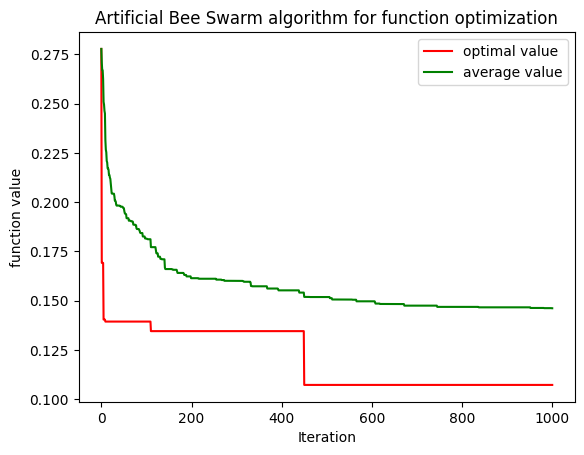

Running time: 367.88186597824097 seconds


In [22]:
# Fitness function (objective function)
def fitness(Bin,AllItem,ran):
    # ran is the packing order.
    itemNum=AllItem.shape[0] 
    BinNum=1;
    RPNXY=[];
    flagItem=np.zeros(itemNum) #Marking whether items are loaded into bin
    utilization_rates = []  
    visualizations = [] 
    
    # Start packing.
    for i in range(itemNum):
        if flagItem[ran[i]]==0:
            item=AllItem[ran[i],:]
            itemRP=Bin  
            flagOL=overlap(item,AllItem,itemRP,RPNXY) 
            if flagOL==0:
                itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                if len(itemRP)>0:
                    RPNXY.append([ran[i],itemRP[0],itemRP[1]])
                    flagItem[ran[i]]=1
    rect_area = 0
    bin_area = Bin[0]*Bin[1]
    for id in RPNXY:
        width,height = AllItem[id[0]]
        rect_area += width*height
    score = rect_area/bin_area
    print('utilisation:{}'.format(score))
    return score

#             #可视化
#             fig, ax = plt.subplots(1, 1)
#             ax1 = fig.gca()
#             for i in RPNXY:
#                 width,height = AllItem[i[0]]
#                 rx,ry = i[1],i[2]
#                 lx,ly = rx-width,ry-height
#                 plt.xlim((0, Bin[0]))
#                 plt.ylim((0, Bin[1]))
#                 color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                 rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
#                 ax1.add_patch(rect)
#             print("利用率: {}".format(utilization_rate))
#             plt.show()
#             #plt.savefig('result.png')
#     print("平均利用率: {}".format(np.mean(utilization_rates)))
            
#     if list(flagItem).count(0)<=0:
#         print("--------------------------------------物品装完---------------------------------\n")
    return score
 
class ABSIndividual:
    def __init__(self,bin,item):
        self.score = 0.
        self.invalidCount = 0 #Number of invalid counts (cumulative number of times results have not been updated)
        self.bin = bin  #Box width and height
        self.allitem = item
        self.ran =  list(range(self.allitem.shape[0]))
        self.calculateFitness()        
 
    def calculateFitness(self):
        self.score = fitness(self.bin,self.allitem,self.ran)#Calculate current score
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount,Bin, item, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount#Number of nectar sources, equal to the number of employed bees
        self.onlookerCount = onlookerCount#Number of onlooker bees 
        self.item = item #Upper and lower bounds for each parameter
        self.maxIterCount = maxIterCount
        self.maxInvalidCount = maxInvalidCount
        self.Bin = Bin
        #The #foodList is a list of foodCount individual bees (i.e., hired bees), each representing a solution with a different packing order.
        self.foodList = [ABSIndividual(self.Bin,self.item) for k in range(self.foodCount)]   #Initialise each nectar source
        #The foodScore is a list storing the best fitness value (score) achieved by each individual bee.
        self.foodScore = [d.score for d in self.foodList]                             #Best results by nectar source
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                      #The best nectar source in the whole world
    
    #Find a suitable permutation
    def updateFood(self, i):  #Update the ith nectar source
        vi = copy.deepcopy(self.foodList[i])
        order =list(range(vi.allitem.shape[0]))
        random.shuffle(order) #Randomly generated pack sequence
        vi.ran = order
        vi.calculateFitness()
        if vi.score > self.foodList[i].score: #If the results are better than the current honey source
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:#If grades are better than history grades
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:#If the results are globally optimal
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    # Implementation of the employed Bees phase
    def employedBeePhase(self):
        for i in range(0, self.foodCount):#Each nectar source is updated in turn
            self.updateFood(i)            
 
    #Implementation of the onlooker bee phase
    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)    
        #Relative scores and index numbers were obtained for each nectar source.
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]
        for k in range(0, self.onlookerCount):
            #Randomly selected from nectar sources with relative scores greater than the randomisation threshold to follow the
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()])
            self.updateFood(i)
 
    #Implementation of the scout bee phase
    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            #If this nectar has not been updated more than the specified threshold, it is reinitialised
            if self.foodList[i].invalidCount > self.maxInvalidCount:
                self.foodList[i] = ABSIndividual(self.Bin, self.item)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)
 
    #Perform a fixed number of iterations
    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
        print("Optimal utilisation:",self.bestFood.score)
        self.printResult(np.array(trace))
 
    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot(x, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        plt.plot(x, [(1-d)/d for d in trace[:, 1]], 'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()
 

if __name__ == "__main__":
    random.seed()
    iternum = 1000
    maxInvalidCount = 50
    abs = ArtificialBeeSwarm(30, 30, Bin, AllItem, iternum, maxInvalidCount)
    start_time = time.time()
    abs.solve()
    end_time = time.time()
    print("Running time: {} seconds".format(end_time - start_time))